In [1158]:
import os
import pandas as pd
import json
import numpy as np
import pickle

In [1159]:
f = open('../metadata/udp_metadata.json')
ner_data = json.load(f)
# Closing file
f.close()

In [1160]:
all_results={}
def save_all_results(all_results):
    root='../results'
    with open(os.path.join(root,'all_results.pickle'),'wb') as f:
        pickle.dump(all_results,f)
def load_all_results():
    with open(os.path.join(root,'all_results.pickle'),'rb') as f:
        all_results = pickle.load(f)
    return all_results

### Dependency Parsing

In [429]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_udp_UD_English-EWT.txt'.format(models[0]),
    '{}_predict_udp_all.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_udp_UD_English-EWT.txt'.format(models[1]),
    '{}_predict_udp_all.txt'.format(models[1])
]

In [430]:
root='../results'

##zeroshot
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
combined = bert_data[['target','lang-code','lang-group',]]
combined['bert_uas_zeroshot']=bert_data['uas']
combined['xlmr_uas_zeroshot']=xlmr_data['uas']

##finetuned
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[1])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[1])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)

##data having no train data scored as '-' for finetuned column
bert_data['uas']=bert_data.apply(lambda x: '-' if x['src']=='UD_English-EWT' and x['target']!='UD_English-EWT'
                                else x['uas'],axis=1)
xlmr_data['uas']=xlmr_data.apply(lambda x: '-' if x['src']=='UD_English-EWT' and x['target']!='UD_English-EWT'
                                else x['uas'],axis=1)

combined['bert_uas_finetuned']=bert_data['uas']
combined['xlmr_uas_finetuned']=xlmr_data['uas']

# ##process singlish zeroshot results
# bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[2])
#                   ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
# xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[2])
#                   ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
# combined.loc[combined['target']=='singlish','bert_uas_zeroshot']=bert_data.iloc[0,4]
# combined.loc[combined['target']=='singlish','xlmr_uas_zeroshot']=xlmr_data.iloc[0,4]

# ##process TwitterAAE zeroshot results
# bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[3])
#                   ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
# xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[3])
#                   ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
# combined.loc[combined['target']=='TwitterAAE','bert_uas_zeroshot']=bert_data.iloc[0,4]
# combined.loc[combined['target']=='TwitterAAE','xlmr_uas_zeroshot']=xlmr_data.iloc[0,4]

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/2517310722.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_uas_zeroshot']=bert_data['uas']
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/2517310722.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr_uas_zeroshot']=xlmr_data['uas']


In [431]:
combined=combined.sort_values(by=['lang-group','bert_uas_zeroshot'],ascending=True)
combined.loc['mean'] = combined.mean().round(2)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1384501362.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined.loc['mean'] = combined.mean().round(2)


In [432]:
combined
all_results={'dep':combined}
save_all_results(all_results)

In [433]:
print(combined.to_latex(index=False))

\begin{tabular}{lllrrll}
\toprule
                           target &              lang-code & lang-group &  bert\_uas\_zeroshot &  xlmr\_uas\_zeroshot & bert\_uas\_finetuned & xlmr\_uas\_finetuned \\
\midrule
                      UD\_Gheg-GPS &                    aln &   Albanian &              38.14 &              43.50 &                  - &                  - \\
                  UD\_Albanian-TSA &                    alb &   Albanian &              81.78 &              83.08 &                  - &                  - \\
                  UD\_Arabic-NYUAD &                ara-msa &     Arabic &               2.77 &               8.13 &               2.35 &               2.75 \\
UD\_Maghrebi\_Arabic\_French-Arabizi &            qaf-arabizi &     Arabic &              34.33 &              28.04 &               5.46 &               54.7 \\
  UD\_South\_Levantine\_Arabic-MADAR &                    ajp &     Arabic &              49.94 &              45.75 &                  - &         

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3017115843.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(index=False))


## sdqa

In [434]:
models=['bert','xlmr'] ##mbert, xlmr

bert_result_files=[
    '{}_predict_sdqa_all_dev.txt'.format(models[0]),
    '{}_predict_sdqa_english_dev.txt'.format(models[0]),
    '{}_predict_sdqa_all_test.txt'.format(models[0]),
     '{}_predict_sdqa_english_test.txt'.format(models[0])
]

xlmr_result_files=[
    '{}_predict_sdqa_all_dev.txt'.format(models[1]),
    '{}_predict_sdqa_english_dev.txt'.format(models[1]),
    '{}_predict_sdqa_all_test.txt'.format(models[1]),
     '{}_predict_sdqa_english_test.txt'.format(models[1])
]

names=['src','target','exact','f1','count']

#### dev

In [435]:
root='../results'

#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[0]),names=names).round(2)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[0]),names=names).round(2)
#zero-shot
bert_zero= pd.read_csv(os.path.join(root,bert_result_files[1]),names=names).round(2)
xlmr_zero= pd.read_csv(os.path.join(root,xlmr_result_files[1]),names=names).round(2)

combined=pd.DataFrame()
combined = bert_tune[['target','count']]
combined['bert_tune_f1']=bert_tune['f1']
combined['xlmr_tune_f1']=xlmr_tune['f1']
combined['bert_zero_f1']=bert_zero['f1']
combined['xlmr_zero_f1']=xlmr_zero['f1']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3530405086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_tune_f1']=bert_tune['f1']
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3530405086.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr_tune_f1']=xlmr_tune['f1']


In [436]:
all_results['sdqa-dev']=combined

In [437]:
print(combined.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
           target &  count &  bert\_tune\_f1 &  xlmr\_tune\_f1 &  bert\_zero\_f1 &  xlmr\_zero\_f1 \\
\midrule
     english--aus &    494 &         73.23 &         68.04 &         67.71 &         62.33 \\
     english--gbr &    494 &         73.30 &         67.57 &         67.90 &         62.49 \\
   english--ind\_n &    494 &         70.28 &         65.32 &         64.46 &         60.84 \\
   english--ind\_s &    494 &         70.96 &         66.04 &         65.43 &         61.72 \\
     english--irl &    494 &         73.00 &         67.98 &         68.62 &         62.45 \\
   english--kenya &    494 &         70.63 &         65.64 &         65.30 &         60.28 \\
     english--nga &    494 &         72.53 &         66.56 &         67.39 &         62.37 \\
     english--nzl &    494 &         73.62 &         68.50 &         68.21 &         63.05 \\
     english--phl &    494 &         73.75 &         67.29 &         67.35 &         61.54 \\
     eng

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3017115843.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(index=False))


#### test

In [438]:
#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[2]),names=names).round(2)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[2]),names=names).round(2)
#zero-shot
bert_zero= pd.read_csv(os.path.join(root,bert_result_files[3]),names=names).round(2)
xlmr_zero= pd.read_csv(os.path.join(root,xlmr_result_files[3]),names=names).round(2)

combined=pd.DataFrame()
combined = bert_tune[['target','count']]
combined['bert_tune_f1']=bert_tune['f1']
combined['xlmr_tune_f1']=xlmr_tune['f1']
combined['bert_zero_f1']=bert_zero['f1']
combined['xlmr_zero_f1']=xlmr_zero['f1']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3957602400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_tune_f1']=bert_tune['f1']
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3957602400.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr_tune_f1']=xlmr_tune['f1']


In [439]:
all_results['sdqa-test']=combined

In [440]:
print(combined.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
           target &  count &  bert\_tune\_f1 &  xlmr\_tune\_f1 &  bert\_zero\_f1 &  xlmr\_zero\_f1 \\
\midrule
     english--aus &    440 &         75.66 &         70.89 &         71.20 &         62.28 \\
     english--gbr &    440 &         76.38 &         70.34 &         71.82 &         63.15 \\
   english--ind\_n &    440 &         74.62 &         68.03 &         68.84 &         61.25 \\
   english--ind\_s &    440 &         71.93 &         66.88 &         66.49 &         60.36 \\
     english--irl &    440 &         75.52 &         70.73 &         70.92 &         62.15 \\
   english--kenya &    440 &         72.59 &         66.68 &         68.72 &         58.64 \\
     english--nga &    440 &         73.61 &         68.33 &         69.10 &         61.27 \\
     english--nzl &    440 &         76.71 &         71.39 &         71.22 &         63.69 \\
     english--phl &    440 &         76.37 &         70.64 &         70.47 &         62.22 \\
     eng

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3017115843.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(index=False))


## Dialect Identification

#### arabic

In [441]:
models=['bert','xlmr'] ##mbert, xlmr

bert_result_files=[
    '{}_predict_did_lm_arabic_madar.txt'.format(models[0]),
]

xlmr_result_files=[
    '{}_predict_did_lm_arabic_madar.txt'.format(models[1]),
]

names=['dataset','dialect','precision','recall','f1','support']

In [442]:
root='../results'

#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[0]),names=names).round(2)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[0]),names=names).round(2)

In [443]:
bert_tune

combined=pd.DataFrame()
combined = bert_tune[['dataset','dialect','support']]

for x in ['precision','recall','f1']:
    combined['bert-'+x]=bert_tune[x]
    combined['xlmr-'+x]=xlmr_tune[x]

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1810034107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert-'+x]=bert_tune[x]
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1810034107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr-'+x]=xlmr_tune[x]


In [444]:
all_results['di-madar']=combined

In [445]:
print(combined.to_latex(index=False))

\begin{tabular}{llrrrrrrr}
\toprule
     dataset &      dialect &  support &  bert-precision &  xlmr-precision &  bert-recall &  xlmr-recall &  bert-f1 &  xlmr-f1 \\
\midrule
arabic\_madar &          ALE &    200.0 &            0.60 &            0.58 &         0.60 &         0.48 &     0.60 &     0.53 \\
arabic\_madar &          ALG &    272.0 &            0.79 &            0.66 &         0.58 &         0.63 &     0.67 &     0.64 \\
arabic\_madar &          ALX &    192.0 &            0.70 &            0.74 &         0.73 &         0.67 &     0.72 &     0.70 \\
arabic\_madar &          AMM &    177.0 &            0.40 &            0.35 &         0.46 &         0.36 &     0.43 &     0.35 \\
arabic\_madar &          ASW &    221.0 &            0.56 &            0.52 &         0.51 &         0.45 &     0.53 &     0.48 \\
arabic\_madar &          BAG &    203.0 &            0.57 &            0.48 &         0.57 &         0.49 &     0.57 &     0.48 \\
arabic\_madar &          BAS &    186.0

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3017115843.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(index=False))


## Topic Classification

In [446]:
from collections import defaultdict
models=['bert','xlmr'] ##mbert, xlmr

source= {"eng_Latn": "English", 
         "ita_Latn": "italian", 
         "azj_Latn":"azarbaijani",
         "ckb_Arab":"kurdish",
         "nob_Latn":"norwegian",
         "nld_Latn":"dutch",
         "lvs_Latn":"latvian", 
         "arb_Arab":"arabic" ,
         "lij_Latn":"Franco-Provencal",
         "zho_Hans":"chinese", 
         "spa_Latn":"Spanish", 
         "nso_Latn":"sotho"}
inv_src = {v: k for k, v in source.items()}

f = open('../metadata/topic_metadata.json')
metadata = json.load(f)
# Closing file
f.close()

for i in metadata:
    metadata[i]['src']=inv_src[metadata[i]['langgroup']]
    
langgroup=defaultdict(list)
for i in inv_src:
    for j in metadata:
        if metadata[j]['langgroup']==i:
            langgroup[i].append(j)

In [447]:
bert_result_files=[]
xlmr_result_files=[]

root='../results'
names=['target','src','acc','f1']
result_dict={'bert':{},
            'xlmr':{}}

all_bert=pd.DataFrame()
all_xlmr=pd.DataFrame()
for i in inv_src:
    lang=inv_src[i]
    bert_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[0],lang)
    xlmr_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[1],lang)

    #finetune
    bert_tune= pd.read_csv(os.path.join(root,bert_result_file),names=names).round(2)
    xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_file),names=names).round(2)
    
    all_bert = pd.concat([all_bert,bert_tune[bert_tune['target'].isin(langgroup[i])]])
    all_xlmr = pd.concat([all_xlmr,xlmr_tune[xlmr_tune['target'].isin(langgroup[i])]])

In [448]:
combined=all_bert[['target','src']]
combined['bert_f1']=all_bert['f1']
combined['xlmr_f1']=all_xlmr['f1']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3401144843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_f1']=all_bert['f1']


In [449]:
lang='eng_Latn'
bert_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[0],lang)
xlmr_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[1],lang)
bert_zero = pd.read_csv(os.path.join(root,bert_result_file),names=names).round(2)
xlmr_zero = pd.read_csv(os.path.join(root,xlmr_result_file),names=names).round(2)

In [450]:
bdict=dict(zip(zip(bert_zero['target'],bert_zero['src']),bert_zero['f1']))
xdict=dict(zip(zip(xlmr_zero['target'],xlmr_zero['src']),xlmr_zero['f1']))

In [451]:
combined['bert_zero']=combined.apply(lambda x: bdict[x['target'],'eng_Latn_sib'],axis=1)
combined['xlmr_zero']=combined.apply(lambda x: xdict[x['target'],'eng_Latn_sib'],axis=1)

In [452]:
all_results['topic']=combined

In [453]:
print(combined.to_latex(index=False))

\begin{tabular}{llrrrr}
\toprule
  target &          src &  bert\_f1 &  xlmr\_f1 &  bert\_zero &  xlmr\_zero \\
\midrule
eng\_Latn & eng\_Latn\_sib &     0.90 &     0.89 &       0.90 &       0.89 \\
lmo\_Latn & ita\_Latn\_sib &     0.71 &     0.65 &       0.70 &       0.60 \\
ita\_Latn & ita\_Latn\_sib &     0.87 &     0.86 &       0.88 &       0.85 \\
fur\_Latn & ita\_Latn\_sib &     0.68 &     0.63 &       0.69 &       0.65 \\
scn\_Latn & ita\_Latn\_sib &     0.73 &     0.59 &       0.75 &       0.60 \\
srd\_Latn & ita\_Latn\_sib &     0.70 &     0.62 &       0.71 &       0.67 \\
vec\_Latn & ita\_Latn\_sib &     0.75 &     0.74 &       0.77 &       0.71 \\
azb\_Arab & azj\_Latn\_sib &     0.70 &     0.68 &       0.66 &       0.67 \\
azj\_Latn & azj\_Latn\_sib &     0.82 &     0.80 &       0.80 &       0.80 \\
tur\_Latn & azj\_Latn\_sib &     0.81 &     0.80 &       0.79 &       0.84 \\
kmr\_Latn & ckb\_Arab\_sib &     0.10 &     0.06 &       0.33 &       0.68 \\
ckb\_Arab & ckb\_Arab

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3017115843.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(index=False))


### Multiple-choice reading comprehension

In [454]:
models=['bert','xlmr'] ##mbert, xlmr

bert_result_files=[
    '{}_predict_reading_comprehension_Belebele.txt'.format(models[0]),
]

xlmr_result_files=[
    '{}_predict_reading_comprehension_Belebele.txt'.format(models[1]),
]

names=['dialect','train','accuracy','f1']

In [455]:
f = open('../metadata/rcmc_metadata.json')
metadata = json.load(f)
# Closing file
f.close()

In [456]:
metadata

{'zho_Hans': {'lang': 'Chinese (Simplified)',
  'code': 'zho_Hans',
  'langgroup': 'chinese'},
 'zho_Hant': {'lang': 'Chinese (Traditional)',
  'code': 'zho_Hant',
  'langgroup': 'chinese'},
 'nso_Latn': {'lang': 'Northern Sotho',
  'code': 'nso_Latn',
  'langgroup': 'sotho'},
 'sot_Latn': {'lang': 'Southern Sotho',
  'code': 'sot_Latn',
  'langgroup': 'sotho'},
 'acm_Arab': {'lang': 'Mesopotamian Arabic',
  'code': 'acm_Arab',
  'langgroup': 'arabic'},
 'apc_Arab': {'lang': 'North Levantine Arabic',
  'code': 'apc_Arab',
  'langgroup': 'arabic'},
 'arb_Arab': {'lang': 'MSA (Arabic)',
  'code': 'arb_Arab',
  'langgroup': 'arabic'},
 'ars_Arab': {'lang': 'Najdi Arabic',
  'code': 'ars_Arab',
  'langgroup': 'arabic'},
 'ary_Arab': {'lang': 'Moroccan Arabic',
  'code': 'ary_Arab',
  'langgroup': 'arabic'},
 'arz_Arab': {'lang': 'Egyptian Arabic',
  'code': 'arz_Arab',
  'langgroup': 'arabic'},
 'eng_Latn': {'lang': 'English', 'code': 'eng_Latn', 'langgroup': 'English'}}

In [457]:
root='../results'

#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[0]),names=names).round(2)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[0]),names=names).round(2)

In [458]:
bert_tune

combined=pd.DataFrame()
combined = bert_tune[['dialect']]
combined['lang-group']=combined.apply(lambda x: metadata[x['dialect']]['langgroup'],axis=1)

for x in ['accuracy','f1']:
    combined['bert-'+x]=bert_tune[x]
    combined['xlmr-'+x]=xlmr_tune[x]

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/4011613481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['lang-group']=combined.apply(lambda x: metadata[x['dialect']]['langgroup'],axis=1)
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/4011613481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert-'+x]=bert_tune[x]


In [459]:
all_results['rcmc']=combined

In [460]:
print(combined.to_latex(index=False))

\begin{tabular}{llrrrr}
\toprule
 dialect & lang-group &  bert-accuracy &  xlmr-accuracy &  bert-f1 &  xlmr-f1 \\
\midrule
zho\_Hans &    chinese &           0.50 &           0.47 &     0.50 &     0.47 \\
zho\_Hant &    chinese &           0.47 &           0.45 &     0.47 &     0.45 \\
eng\_Latn &    English &           0.52 &           0.54 &     0.52 &     0.53 \\
nso\_Latn &      sotho &           0.31 &           0.30 &     0.31 &     0.30 \\
sot\_Latn &      sotho &           0.29 &           0.29 &     0.29 &     0.29 \\
acm\_Arab &     arabic &           0.38 &           0.41 &     0.38 &     0.41 \\
apc\_Arab &     arabic &           0.39 &           0.41 &     0.39 &     0.41 \\
arb\_Arab &     arabic &           0.39 &           0.44 &     0.39 &     0.44 \\
ars\_Arab &     arabic &           0.36 &           0.38 &     0.36 &     0.38 \\
ary\_Arab &     arabic &           0.37 &           0.38 &     0.37 &     0.38 \\
arz\_Arab &     arabic &           0.36 &           0.38 

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3017115843.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(index=False))


### NER

In [461]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_ner_all.txt'.format(models[0]),
    '{}_predict_ner_en.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_ner_all.txt'.format(models[1]),
    '{}_predict_ner_en.txt'.format(models[1])
]

In [462]:
root='../results'

##finetune
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset',
                          'acc','f1']).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset','acc','f1']).round(2)
combined = bert_data[['tgt-code','tgt','src','lang-group','dataset','support']]
combined['bert_f1_tune']=bert_data['f1']*100
combined['xlmr_f1_tune']=xlmr_data['f1']*100

##zeroshot
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[1])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset',
                          'acc','f1']).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[1])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset','acc','f1']).round(2)

combined['bert_f1_zeroshot']=bert_data['f1']*100
combined['xlmr_f1_zeroshot']=xlmr_data['f1']*100

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/2061235944.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_f1_tune']=bert_data['f1']*100


In [463]:
combined=combined.sort_values(by=['lang-group','bert_f1_zeroshot'],ascending=True)
combined.loc['mean'] = combined.mean().round(2)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/295177862.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined.loc['mean'] = combined.mean().round(2)


In [464]:
combined['support']=combined[['support']].applymap(np.int64)

In [465]:
rname='bert_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='en' and x['lang-group']!='english'
                                else x[rname],axis=1)
rname='xlmr_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='en' and x['lang-group']!='english'
                                else x[rname],axis=1)


# combined

In [466]:
combined=combined.set_index(['lang-group','tgt-code'])

In [467]:
all_results['ner']=combined

In [468]:
combined

tgt  src  dataset  support  bert_f1_tune  \
lang-group    tgt-code                                                         
adyghe        kbd             kabardian   en  wikiann     1482         -1.00   
              ady                adyghe   en  wikiann      693         -1.00   
arabic        ar                 arabic   ar  wikiann    10000         89.00   
              arz       egyptian arabic   ar  wikiann      100         68.00   
              kab                kabyle   ar  wikiann     3004         48.00   
...                                 ...  ...      ...      ...           ...   
turkish       crh       crimean turkish   tr  wikiann      100         58.00   
              tr                turkish   tr  wikiann    10000         93.00   
upper sorbian hsb         upper sorbian  hsb  wikiann      100         38.00   
              dsb         lower sorbian  hsb  wikiann      862          3.00   
NaN           NaN                   NaN  NaN      NaN     2548         65.04   

                        xlmr_f1_tune  bert_f1_zeroshot  xlmr_f1_zeroshot  
lang-group    tgt-code                                                    
adyghe        kbd              -1.00             48.00             35.00  
              ady              -1.00             67.00             54.00  
arabic        ar               88.00             41.00             42.00  
              arz              73.00             44.00             51.00  
              kab              50.00             58.00             58.00  
...                              ...               ...               ...  
turkish       crh              53.00             48.00             41.00  
              tr               92.00             74.00             76.00  
upper sorbian hsb               0.00             65.00             65.00  
              dsb               0.00             71.00             69.00  
NaN           NaN              60.81             59.47             57.72  

[90 rows x 8 columns]

In [469]:
print(combined.to_latex(longtable=True,multirow=True, multicolumn=True,
                        label='tab:ner',caption='ner'))

\begin{longtable}{lllllrrrrr}
\caption{ner}
\label{tab:ner}\\
\toprule
    &     &                      tgt &       src &        dataset &  support &  bert\_f1\_tune &  xlmr\_f1\_tune &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot \\
lang-group & tgt-code &                          &           &                &          &               &               &                   &                   \\
\midrule
\endfirsthead
\caption[]{ner} \\
\toprule
    &     &                      tgt &       src &        dataset &  support &  bert\_f1\_tune &  xlmr\_f1\_tune &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot \\
lang-group & tgt-code &                          &           &                &          &               &               &                   &                   \\
\midrule
\endhead
\midrule
\multicolumn{10}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
\multirow{2}{*}{adyghe} & kbd &                kabardian &        en &        wikiann &     1482 &         -1.

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1189800320.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(longtable=True,multirow=True, multicolumn=True,


### NLI

In [470]:
f = open('../metadata/nli_metadata.json')
metadata = json.load(f)
# Closing file
f.close()

In [471]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_nli_eng_Latn.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_nli_eng_Latn.txt'.format(models[0])
]

In [472]:
root='../results'

##finetune
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=['tgt','src','acc','f1'])
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=['tgt','src','acc','f1'])
combined = bert_data[['tgt','src']]
combined['lang-group']=combined.apply(lambda x: metadata[x['tgt']]['langgroup'],axis=1)
combined['bert_acc']=bert_data['acc']*100
combined['xlmr_acc']=xlmr_data['acc']*100
combined['bert_f1']=bert_data['f1']*100
combined['xlmr_f1']=xlmr_data['f1']*100
combined=combined.round(2)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/4164588965.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['lang-group']=combined.apply(lambda x: metadata[x['tgt']]['langgroup'],axis=1)


In [473]:
len(combined)

41

In [474]:
combined=combined.sort_values(by=['lang-group','bert_f1'],ascending=True)

In [475]:
combined=combined.set_index(['lang-group','tgt'])

In [476]:
all_results['nli']=combined

In [477]:
combined

src  bert_acc  xlmr_acc  bert_f1  xlmr_f1
lang-group       tgt                                                     
Beng             asm_Beng  eng_Latn     43.61     43.61    40.24    40.24
                 ben_Beng  eng_Latn     60.38     60.38    59.97    59.97
English          eng_Latn  eng_Latn     81.90     81.90    81.95    81.95
Franco-Provencal lij_Latn  eng_Latn     57.82     57.82    56.70    56.70
                 oci_Latn  eng_Latn     68.48     68.48    68.47    68.47
Spanish          glg_Latn  eng_Latn     73.39     73.39    73.39    73.39
                 por_Latn  eng_Latn     73.73     73.73    73.73    73.73
                 spa_Latn  eng_Latn     75.13     75.13    75.15    75.15
arabic           kab_Latn  eng_Latn     37.09     37.09    31.45    31.45
                 aeb_Arab  eng_Latn     47.54     47.54    47.42    47.42
                 apc_Arab  eng_Latn     52.14     52.14    51.40    51.40
                 acm_Arab  eng_Latn     52.95     52.95    52.84    52.84
                 ajp_Arab  eng_Latn     54.09     54.09    53.42    53.42
                 arz_Arab  eng_Latn     54.53     54.53    53.86    53.86
                 ary_Arab  eng_Latn     54.65     54.65    54.61    54.61
                 acq_Arab  eng_Latn     58.84     58.84    58.64    58.64
                 ars_Arab  eng_Latn     59.42     59.42    59.14    59.14
                 arb_Arab  eng_Latn     65.57     65.57    65.57    65.57
azarbaijani      azb_Arab  eng_Latn     46.05     46.05    44.58    44.58
                 tur_Latn  eng_Latn     59.14     59.14    58.37    58.37
                 azj_Latn  eng_Latn     59.76     59.76    59.20    59.20
chinese          yue_Hant  eng_Latn     60.44     60.44    60.27    60.27
                 zho_Hant  eng_Latn     61.72     61.72    61.48    61.48
                 zho_Hans  eng_Latn     68.52     68.52    68.54    68.54
dutch            lim_Latn  eng_Latn     50.80     50.80    50.31    50.31
                 ltz_Latn  eng_Latn     60.34     60.34    60.01    60.01
                 nld_Latn  eng_Latn     71.76     71.76    71.77    71.77
italian          fur_Latn  eng_Latn     55.25     55.25    54.01    54.01
                 srd_Latn  eng_Latn     57.47     57.47    56.63    56.63
                 lmo_Latn  eng_Latn     59.38     59.38    59.34    59.34
                 scn_Latn  eng_Latn     62.69     62.69    62.66    62.66
                 vec_Latn  eng_Latn     65.15     65.15    64.99    64.99
                 ita_Latn  eng_Latn     73.71     73.71    73.71    73.71
kurdish          kmr_Latn  eng_Latn     39.10     39.10    33.93    33.93
                 ckb_Arab  eng_Latn     40.98     40.98    37.40    37.40
latvian          ltg_Latn  eng_Latn     48.62     48.62    47.02    47.02
                 lvs_Latn  eng_Latn     60.14     60.14    59.95    59.95
norwegian        nno_Latn  eng_Latn     68.08     68.08    68.10    68.10
                 nob_Latn  eng_Latn     72.44     72.44    72.45    72.45
sotho            sot_Latn  eng_Latn     39.36     39.36    34.62    34.62
                 nso_Latn  eng_Latn     39.38     39.38    35.06    35.06

In [478]:
print(combined.to_latex(longtable=True,multirow=True, multicolumn=True,
                        label='tab:nli',caption='NLI'))

\begin{longtable}{lllrrrr}
\caption{NLI}
\label{tab:nli}\\
\toprule
      &          &       src &  bert\_acc &  xlmr\_acc &  bert\_f1 &  xlmr\_f1 \\
lang-group & tgt &           &           &           &          &          \\
\midrule
\endfirsthead
\caption[]{NLI} \\
\toprule
      &          &       src &  bert\_acc &  xlmr\_acc &  bert\_f1 &  xlmr\_f1 \\
lang-group & tgt &           &           &           &          &          \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
\multirow{2}{*}{Beng} & asm\_Beng &  eng\_Latn &     43.61 &     43.61 &    40.24 &    40.24 \\
      & ben\_Beng &  eng\_Latn &     60.38 &     60.38 &    59.97 &    59.97 \\
\cline{1-7}
English & eng\_Latn &  eng\_Latn &     81.90 &     81.90 &    81.95 &    81.95 \\
\multirow{2}{*}{Franco-Provencal} & lij\_Latn &  eng\_Latn &     57.82 &     57.82 &    56.70 &    56.70 \\
      & oci\_Latn &  eng\_Latn &     68.48 &     68.48 &    68.4

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3824225983.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(longtable=True,multirow=True, multicolumn=True,


### POS TAGGING

In [479]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_pos_UD_English-EWT.txt'.format(models[0]),
    '{}_predict_pos_all.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_pos_UD_English-EWT.txt'.format(models[1]),
    '{}_predict_pos_all.txt'.format(models[1])
]

In [480]:
root='../results'
cols=['tgt-code','tgt','src','lang-group','support','dataset','acc','f1']

##finetuned
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[1])
                  ,names=cols).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[1])
                  ,names=cols).round(2)

combined = bert_data[['tgt-code','tgt','src','lang-group','dataset','support']]
combined['bert_f1_tune']=bert_data['f1']
combined['xlmr_f1_tune']=xlmr_data['f1']

##zeroshot
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=cols).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=cols).round(2)
combined['bert_f1_zeroshot']=bert_data['f1']
combined['xlmr_f1_zeroshot']=xlmr_data['f1']



/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1563495397.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_f1_tune']=bert_data['f1']


In [481]:
rname='bert_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='UD_English-EWT' and x['lang-group']!='english'
                                else x[rname],axis=1)
rname='xlmr_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='UD_English-EWT' and x['lang-group']!='english'
                                else x[rname],axis=1)

In [482]:
combined=combined.sort_values(by=['lang-group','bert_f1_tune'],ascending=True)

In [483]:
combined=combined.set_index(['lang-group','tgt-code'])

In [484]:
all_results['pos']=combined

In [485]:
combined

tgt  \
lang-group tgt-code                                                  
Albanian   UD_Gheg-GPS                                        Gheg   
           UD_Albanian-TSA                                Albanian   
Arabic     UD_South_Levantine_Arabic-MADAR  South_Levantine_Arabic   
           UD_Arabic-PUD                                    Arabic   
           dar-egy                                          Arabic   
...                                                            ...   
Portuguese UD_Portuguese-CINTIL                         Portuguese   
           UD_Portuguese-GSD                            Portuguese   
           UD_Portuguese-PetroGold                      Portuguese   
Sami       UD_Skolt_Sami-Giellagas                      Skolt_Sami   
           UD_North_Sami-Giella                         North_Sami   

                                                                src dataset  \
lang-group tgt-code                                                           
Albanian   UD_Gheg-GPS                               UD_English-EWT      ud   
           UD_Albanian-TSA                           UD_English-EWT      ud   
Arabic     UD_South_Levantine_Arabic-MADAR           UD_English-EWT      ud   
           UD_Arabic-PUD                             UD_English-EWT      ud   
           dar-egy                                   UD_English-EWT   noisy   
...                                                             ...     ...   
Portuguese UD_Portuguese-CINTIL                UD_Portuguese-CINTIL      ud   
           UD_Portuguese-GSD                      UD_Portuguese-GSD      ud   
           UD_Portuguese-PetroGold          UD_Portuguese-PetroGold      ud   
Sami       UD_Skolt_Sami-Giellagas                   UD_English-EWT      ud   
           UD_North_Sami-Giella                UD_North_Sami-Giella      ud   

                                            support  bert_f1_tune  \
lang-group tgt-code                                                 
Albanian   UD_Gheg-GPS                          966         -1.00   
           UD_Albanian-TSA                       60         -1.00   
Arabic     UD_South_Levantine_Arabic-MADAR      100         -1.00   
           UD_Arabic-PUD                       1000         -1.00   
           dar-egy                              350         -1.00   
...                                             ...           ...   
Portuguese UD_Portuguese-CINTIL                3840          0.98   
           UD_Portuguese-GSD                   1200          0.98   
           UD_Portuguese-PetroGold             1039          0.99   
Sami       UD_Skolt_Sami-Giellagas              244         -1.00   
           UD_North_Sami-Giella                 865          0.79   

                                            xlmr_f1_tune  bert_f1_zeroshot  \
lang-group tgt-code                                                          
Albanian   UD_Gheg-GPS                             -1.00              0.49   
           UD_Albanian-TSA                         -1.00              0.76   
Arabic     UD_South_Levantine_Arabic-MADAR         -1.00              0.52   
           UD_Arabic-PUD                           -1.00              0.62   
           dar-egy                                 -1.00              0.36   
...                                                  ...               ...   
Portuguese UD_Portuguese-CINTIL                     0.98              0.76   
           UD_Portuguese-GSD                        0.99              0.79   
           UD_Portuguese-PetroGold                  0.99              0.79   
Sami       UD_Skolt_Sami-Giellagas                 -1.00              0.20   
           UD_North_Sami-Giella                     0.71              0.36   

                                            xlmr_f1_zeroshot  
lang-group tgt-code                                           
Albanian   UD_Gheg-GPS                                  0.56  
           UD_Albanian

In [486]:
print(combined.to_latex(longtable=True,multirow=True, multicolumn=True,
                        label='tab:pos',caption='pos'))

\begin{longtable}{lllllrrrrr}
\caption{pos}
\label{tab:pos}\\
\toprule
     &                      &                     tgt &                                src & dataset &  support &  bert\_f1\_tune &  xlmr\_f1\_tune &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot \\
lang-group & tgt-code &                         &                                    &         &          &               &               &                   &                   \\
\midrule
\endfirsthead
\caption[]{pos} \\
\toprule
     &                      &                     tgt &                                src & dataset &  support &  bert\_f1\_tune &  xlmr\_f1\_tune &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot \\
lang-group & tgt-code &                         &                                    &         &          &               &               &                   &                   \\
\midrule
\endhead
\midrule
\multicolumn{10}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
\multi

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/379589356.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(longtable=True,multirow=True, multicolumn=True,


In [487]:
combined

tgt  \
lang-group tgt-code                                                  
Albanian   UD_Gheg-GPS                                        Gheg   
           UD_Albanian-TSA                                Albanian   
Arabic     UD_South_Levantine_Arabic-MADAR  South_Levantine_Arabic   
           UD_Arabic-PUD                                    Arabic   
           dar-egy                                          Arabic   
...                                                            ...   
Portuguese UD_Portuguese-CINTIL                         Portuguese   
           UD_Portuguese-GSD                            Portuguese   
           UD_Portuguese-PetroGold                      Portuguese   
Sami       UD_Skolt_Sami-Giellagas                      Skolt_Sami   
           UD_North_Sami-Giella                         North_Sami   

                                                                src dataset  \
lang-group tgt-code                                                           
Albanian   UD_Gheg-GPS                               UD_English-EWT      ud   
           UD_Albanian-TSA                           UD_English-EWT      ud   
Arabic     UD_South_Levantine_Arabic-MADAR           UD_English-EWT      ud   
           UD_Arabic-PUD                             UD_English-EWT      ud   
           dar-egy                                   UD_English-EWT   noisy   
...                                                             ...     ...   
Portuguese UD_Portuguese-CINTIL                UD_Portuguese-CINTIL      ud   
           UD_Portuguese-GSD                      UD_Portuguese-GSD      ud   
           UD_Portuguese-PetroGold          UD_Portuguese-PetroGold      ud   
Sami       UD_Skolt_Sami-Giellagas                   UD_English-EWT      ud   
           UD_North_Sami-Giella                UD_North_Sami-Giella      ud   

                                            support  bert_f1_tune  \
lang-group tgt-code                                                 
Albanian   UD_Gheg-GPS                          966         -1.00   
           UD_Albanian-TSA                       60         -1.00   
Arabic     UD_South_Levantine_Arabic-MADAR      100         -1.00   
           UD_Arabic-PUD                       1000         -1.00   
           dar-egy                              350         -1.00   
...                                             ...           ...   
Portuguese UD_Portuguese-CINTIL                3840          0.98   
           UD_Portuguese-GSD                   1200          0.98   
           UD_Portuguese-PetroGold             1039          0.99   
Sami       UD_Skolt_Sami-Giellagas              244         -1.00   
           UD_North_Sami-Giella                 865          0.79   

                                            xlmr_f1_tune  bert_f1_zeroshot  \
lang-group tgt-code                                                          
Albanian   UD_Gheg-GPS                             -1.00              0.49   
           UD_Albanian-TSA                         -1.00              0.76   
Arabic     UD_South_Levantine_Arabic-MADAR         -1.00              0.52   
           UD_Arabic-PUD                           -1.00              0.62   
           dar-egy                                 -1.00              0.36   
...                                                  ...               ...   
Portuguese UD_Portuguese-CINTIL                     0.98              0.76   
           UD_Portuguese-GSD                        0.99              0.79   
           UD_Portuguese-PetroGold                  0.99              0.79   
Sami       UD_Skolt_Sami-Giellagas                 -1.00              0.20   
           UD_North_Sami-Giella                     0.71              0.36   

                                            xlmr_f1_zeroshot  
lang-group tgt-code                                           
Albanian   UD_Gheg-GPS                                  0.56  
           UD_Albanian

In [488]:
save_all_results(all_results)

# dialects

In [489]:
dialect_metadata={
    'nli':{
        'file':'../metadata/nli_metadata.json',
        'multirow':'langgroup',
        'secondary':'lang',
        'key':'code',
    },
    'ner':{
        'file':'../metadata/ner_metadata.json',
        'multirow':'langgroup',
        'secondary':'code',
        'key':'lang',
    }
}

In [490]:
all_d=pd.DataFrame()
for k,dm in dialect_metadata.items():
    metafile=dm['file']
    f = open(metafile)
    nli_metadata = json.load(f)
    # Closing file
    df=pd.DataFrame.from_dict(nli_metadata).T
    all_d=pd.concat([all_d,df])
    f.close()
 

multirow='langgroup'
secondary='code'
key='lang'

df=all_d
df=df.reset_index()
df=df.sort_values(by=multirow)
df=df.set_index([multirow,secondary])

In [491]:
print(df[[key]].to_latex(longtable=True,multicolumn=True,multirow=True))

\begin{longtable}{lll}
\toprule
              &     &                     lang \\
langgroup & code &                          \\
\midrule
\endfirsthead

\toprule
              &     &                     lang \\
langgroup & code &                          \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
\multirow{2}{*}{Beng} & ben\_Beng &                  Bengali \\
              & asm\_Beng &                 Assamese \\
\cline{1-3}
English & eng\_Latn &                  English \\
\multirow{2}{*}{Franco-Provencal} & oci\_Latn &                  Occitan \\
              & lij\_Latn &                 Ligurian \\
\cline{1-3}
\multirow{3}{*}{Spanish} & spa\_Latn &                  Spanish \\
              & glg\_Latn &                 Galician \\
              & por\_Latn &               Portuguese \\
\cline{1-3}
\multirow{2}{*}{adyghe} & ady &                   adyghe \\
              & kbd &                kabardia

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1209795163.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[[key]].to_latex(longtable=True,multicolumn=True,multirow=True))


In [492]:
print(df[[key]].to_latex(multicolumn=True,multirow=True))

\begin{tabular}{lll}
\toprule
              &     &                     lang \\
langgroup & code &                          \\
\midrule
\multirow{2}{*}{Beng} & ben\_Beng &                  Bengali \\
              & asm\_Beng &                 Assamese \\
\cline{1-3}
English & eng\_Latn &                  English \\
\multirow{2}{*}{Franco-Provencal} & oci\_Latn &                  Occitan \\
              & lij\_Latn &                 Ligurian \\
\cline{1-3}
\multirow{3}{*}{Spanish} & spa\_Latn &                  Spanish \\
              & glg\_Latn &                 Galician \\
              & por\_Latn &               Portuguese \\
\cline{1-3}
\multirow{2}{*}{adyghe} & ady &                   adyghe \\
              & kbd &                kabardian \\
\cline{1-3}
\multirow{13}{*}{arabic} & ary\_Arab &          Moroccan Arabic \\
              & ars\_Arab &             Najdi Arabic \\
              & kab\_Latn &                   Kabyle \\
              & apc\_Arab &   North Levantine 

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/913528025.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[[key]].to_latex(multicolumn=True,multirow=True))


### analysis

In [1165]:
all_results=load_all_results()

In [1166]:

all_results.keys()

dict_keys(['dep', 'sdqa-dev', 'sdqa-test', 'di-madar', 'topic', 'rcmc', 'ner', 'nli', 'pos'])

In [1196]:
group_langs={
    'dep':{
        'Arabic':'UD_Arabic-PADT',
        'Albanian':'UD_Albanian-TSA',
        'Armenian':'UD_Armenian-ArmTDP',
        'Chinese':'UD_Chinese-GSDSimp',
        'Dutch':'UD_Dutch-Alpino',
        'English':'UD_English-EWT',
        'French':'UD_French-ParTUT',
        'German':'UD_German-LIT',
        'Italian':'UD_Italian-MarkIT',
        'Norwegian':'UD_Norwegian-Bokmaal',
        'Portuguese':'UD_Portuguese-Bosque',
        'Sami':'UD_North_Sami-Giella',
        'Komi':'UD_Komi_Zyrian-IKDP',
        'Guarani':'UD_Guarani-OldTuDeT'
    },
    'pos':{
         'Albanian':'UD_Albanian-TSA',
         'Arabic':'UD_Arabic-PADT',
         'Armenian':'UD_Armenian-ArmTDP',
         'Chinese':'UD_Chinese-GSDSimp',
         'Dutch':'UD_Dutch-Alpino',
         'Finnish':'UD_Finnish-TDT',
         'French':'UD_French-ParTUT',
        'English':'UD_English-EWT',
         'French-occ':'UD_French-GSD',
         'German':'UD_German-LIT',
         'Guarani':'UD_Guarani-OldTuDeT',
         'Italian':'UD_Italian-MarkIT',
         'Komi':'UD_Komi_Zyrian-IKDP',
         'Norwegian':'UD_Norwegian-Bokmaal',
         'Portuguese':'UD_Portuguese-Bosque',
         'Sami':'UD_North_Sami-Giella',
    },
    'ner':{'adyghe': 'ady',
         'arabic': 'ar',
         'azerbaijani': 'az',
         'bangla': 'bn',
         'chinese': 'zh',
         'croatian': 'hr',
         'dutch': 'nl',
         'eastern mari': 'mhr',
         'english': 'en',
         'french': 'fr',
         'german': 'de',
         'greek': 'el',
         'hindi': 'hi',
         'italian': 'it',
         'komi': 'kv',
         'kurdish': 'ku',
         'latvian': 'lv',
         'northern sotho': 'nso',
         'punjabi': 'pa',
         'romanian': 'ro',
         'spanish': 'es',
         'turkish': 'tr',
           'innuktitut': 'ik',
         'upper sorbian': 'hsb'},
    'topic':{'eng': 'eng_Latn',
         'ita': 'ita_Latn',
         'azj': 'azj_Latn',
         'ckb': 'ckb_Arab',
         'nob': 'nob_Latn',
         'nld': 'nld_Latn',
         'lvs': 'lvs_Latn',
         'arb': 'arb_Arab',
         'lij': 'lij_Latn',
         'zho': 'zho_Hant',
         'spa': 'spa_Latn',
         'nso': 'nso_Latn'},
    'nli':{'Beng':'ben_Beng',
            'English':'eng_Latn',
            'Franco-Provencal':'lij_Latn',
            'Spanish':'spa_Latn',
            'arabic':'arb_Arab',
             'azarbaijani':'azb_Arab',
            'chinese':'zho_Hant',
            'dutch':'nld_Latn',
            'italian':'ita_Latn',
            'kurdish':'ckb_Arab',
            'latvian':'lvs_Latn',
            'norwegian':'nob_Latn',
            'sotho':'nso_Latn'},
    'rcmc':{
            'English':'eng_Latn',
            'arabic':'arb_Arab',
            'chinese':'zho_Hant',
            'sotho':'nso_Latn'}

}


In [1233]:
# def zero_gap(df,column,target_lang_column,metadata):
#     base_score=df.loc[df[target_lang_column]==base_code,score_column].values[0]
#     if 'mean' in df.index:
#         df = df.iloc[:-1]
#     df['base_score']=base_score
#     df['base_zero_gap']=df['base_score']-df[column]
#     score_dict=dict(zip(df[target_lang_column],df[column]))
#     df['group_zero_gap']=df.apply(lambda x: score_dict[metadata[x['lang-group']]] -x[column],axis=1)
#     df = df.loc[df['group_zero_gap']!=0]
#     df_grouped = df.groupby('lang-group').agg({'base_zero_gap': 'mean',
#                                             'group_zero_gap': 'mean'})
#     df_grouped.loc['mean'] = df_grouped.mean().round(2)
#     df_grouped.reset_index(level=0, inplace=True)
#     return df_grouped


# def zero_tune_distance(df,column_zero, column_tune, target_lang_column,metadata):
#     if 'mean' in df.index:
#         df = df.iloc[:-1]
#     df['zero_tune_gap']=df[column_tune]-df[column_zero]
#     df_grouped = df.groupby('lang-group').agg({
#                                             'zero_tune_gap': 'mean'})
#     df_grouped.loc['mean'] = df_grouped.mean().round(2)
#     df_grouped.reset_index(level=0, inplace=True)
    
#     return df_grouped

# def tune_gap(df,column_zero, column_tune, target_lang_column,metadata):
#     if 'mean' in df.index:
#         df = df.iloc[:-1]
#     df['zero_gap']=df[column_tune]-df[column_zero]
    
#     score_dict=dict(zip(df[target_lang_column],df[column_tune]))
#     grp_count=dict(df.groupby('lang-group')['lang-group'].count())
#     df['grp_count']=df.apply(lambda x:grp_count[x['lang-group']],axis=1)
#     df=df[df['grp_count']>1]
#     df['tune_gap']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
#                                   if metadata[x['lang-group']] in score_dict else 0,axis=1)

#     df=df[df[target_lang_column].isin(list(metadata.values()))==False]
# #     df = df.loc[df['tune_gap']!=0]
#     df_grouped = df.groupby('lang-group').agg({
#                                             'tune_gap': 'mean'})
#     df_grouped.loc['mean'] = df_grouped.mean().round(2)
#     df_grouped.reset_index(level=0, inplace=True)
#     return df_grouped

In [1286]:
def zero_gap(df,column,target_lang_column,base_code,metadata):
    base_score=df.loc[df[target_lang_column]==base_code,score_column].values[0]
    if 'mean' in df.index:
        df = df.iloc[:-1]
    df['base_score']=base_score
    df['base_zero_gap_abs']=df['base_score']-df[column]
    df['base_zero_gap_per']=((df['base_score']-df[column])*100)/df['base_score']
    score_dict=dict(zip(df[target_lang_column],df[column]))
    df['group_zero_gap_abs']=df.apply(lambda x: score_dict[metadata[x['lang-group']]] -x[column],axis=1)
    df['group_zero_gap_per']=df.apply(lambda x: ((score_dict[metadata[x['lang-group']]] -
                                                  x[column])*100)/score_dict[metadata[x['lang-group']]],axis=1)
    
    df_filter = df.loc[df[target_lang_column]!=base_code].copy()
    df_grouped_zero = df_filter.groupby('lang-group').agg({'base_zero_gap_per': 
                                                           'mean'})['base_zero_gap_per'].to_dict()
#     print(df_grouped_zero)
    df['base_zero_group']=df.apply(lambda x: df_grouped_zero[x['lang-group']] if 
                                   x['lang-group'] in df_grouped_zero else 0 ,axis=1)
    
    df_filter = df.loc[~df[target_lang_column].isin(list(metadata.values()))].copy()
    df_grouped_group = df_filter.groupby('lang-group').agg({'group_zero_gap_per': 
                                                           'mean'})['group_zero_gap_per'].to_dict()
    df['group_zero_group']=df.apply(lambda x: df_grouped_group[x['lang-group']] if 
                                   x['lang-group'] in df_grouped_group else 0,axis=1)
    df['avg_zero_group_per']=(df['base_zero_group']+df['group_zero_group'])/2
    df=df.sort_values(by=['avg_zero_group_per'],ascending=False)
    df['rank']=df['avg_zero_group_per'].rank(method='min', ascending=False)
    df['qct']=pd.cut(df['rank'], bins=4, labels=[1, 2, 3, 4]).astype(int)
#     df_grouped.loc['mean'] = df_grouped.mean().round(2)
#     df_grouped.reset_index(level=0, inplace=True)
    return df


In [1235]:
def tune_gap(df,column_zero, column_tune, target_lang_column,metadata):
    if 'mean' in df.index:
        df = df.iloc[:-1]
    
    score_dict=dict(zip(df[target_lang_column],df[column_tune]))
    grp_count=dict(df.groupby('lang-group')['lang-group'].count())
    df['grp_count']=df.apply(lambda x:grp_count[x['lang-group']],axis=1)
    df=df[df['grp_count']>1]
    df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
                                  if metadata[x['lang-group']] in score_dict else 0,axis=1)
    df['tune_gap_per']=df.apply(lambda x: 
                                ((score_dict[metadata[x['lang-group']]] -
                                  x[column_tune])*100/score_dict[metadata[x['lang-group']]])
                                  if metadata[x['lang-group']] in score_dict else 0,axis=1)

    df_filter=df[df[target_lang_column].isin(list(metadata.values()))==False]
#     df = df.loc[df['tune_gap']!=0]
    df_grouped = df_filter.groupby('lang-group').agg({
                                            'tune_gap_per': 'mean'})['tune_gap_per'].to_dict()
    df['group_tune_group']=df.apply(lambda x: df_grouped[x['lang-group']],axis=1)

    return df[[target_lang_column,'tune_gap_abs','tune_gap_per','group_tune_group']]

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grp_count']=df.apply(lambda x:grp_count[x['lang-group']],axis=1)
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3531186326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['base_score']=base_score
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/3531186326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [732]:
# gap_dict={}
# gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['base_zero_gap','group_zero_gap']].values[0]

# d_gap_dict={}
# d_gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['zero_tune_gap','tune_gap']].values[0]

# lang_grp_count={}

In [2072]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='dep'
df=all_results[task].copy()

score_column_zero='bert_uas_zeroshot'
score_column_tune='bert_uas_finetuned'
target_lang_column='target'
metadata=group_langs[task]


df=df[df[score_column_tune]!='-']


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)


####based on zero-shot column
df=all_results[task].copy()

base_code='UD_English-EWT'
score_column='bert_uas_zeroshot'
target_lang_column='target'
metadata=group_langs[task]

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)

df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grp_count']=df.apply(lambda x:grp_count[x['lang-group']],axis=1)
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/4148902669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['base_score']=base_score
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/4148902669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [2028]:
agg_df

,lang-group,base_zero_group,group_zero_group,group_tune_group
0,Sami,70.833333,44.444444,0.000000
1,Komi,68.402778,39.024390,0.000000
2,Arabic,62.083333,11.250000,59.895833
3,Albanian,34.895833,35.526316,0.000000
4,Italian,38.541667,30.625000,27.956989
5,German,24.218750,21.839080,0.000000
8,Dutch,17.187500,17.241379,0.000000
6,English,20.833333,20.833333,9.375000
7,Chinese,39.791667,0.431034,5.263158
12,Guarani,86.458333,-66.666667,0.000000


In [2073]:
agg_dfs={}
agg_df1=df3[['lang-group','base_zero_group','group_zero_group','group_tune_group']].copy()
agg_df1.drop_duplicates(keep='last', inplace=True)
agg_df2=agg_df1.groupby('lang-group')['group_tune_group'].max().reset_index()
agg_df2
agg_df = pd.merge(agg_df1[['lang-group','base_zero_group','group_zero_group']], 
                  agg_df2, how='left', on='lang-group').fillna(0)

agg_df.drop_duplicates(keep='last', inplace=True)
agg_df['mean']=agg_df.apply(lambda x: (x['base_zero_group']+x['group_zero_group']+x['group_tune_group'])/3
                           if x['group_tune_group']!=0 
                           else (x['base_zero_group']+x['group_zero_group'])/2, axis=1)
agg_df=agg_df.sort_values(by=['mean'],ascending=False)
# agg_df.drop(columns=['mean'],inplace=True)
agg_df.reset_index(drop=True,inplace=True)
agg_dfs[task]=agg_df
agg_dfs[task]

,lang-group,base_zero_group,group_zero_group,group_tune_group,mean
0,Guarani,83.600947,50.265722,0.000000,66.933334
1,Arabic,55.539050,24.980342,95.586074,58.701822
2,Sami,76.521027,17.684478,0.000000,47.102753
3,German,46.452758,43.363157,0.000000,44.907957
4,Albanian,34.505735,53.362680,0.000000,43.934207
5,Komi,73.049336,12.365192,0.000000,42.707264
6,Chinese,42.746040,2.188379,77.632328,40.855582
7,Italian,38.272607,30.853833,29.692688,32.939709
8,Dutch,30.360459,28.338718,0.000000,29.349589
9,English,34.238121,34.238121,10.038230,26.171491


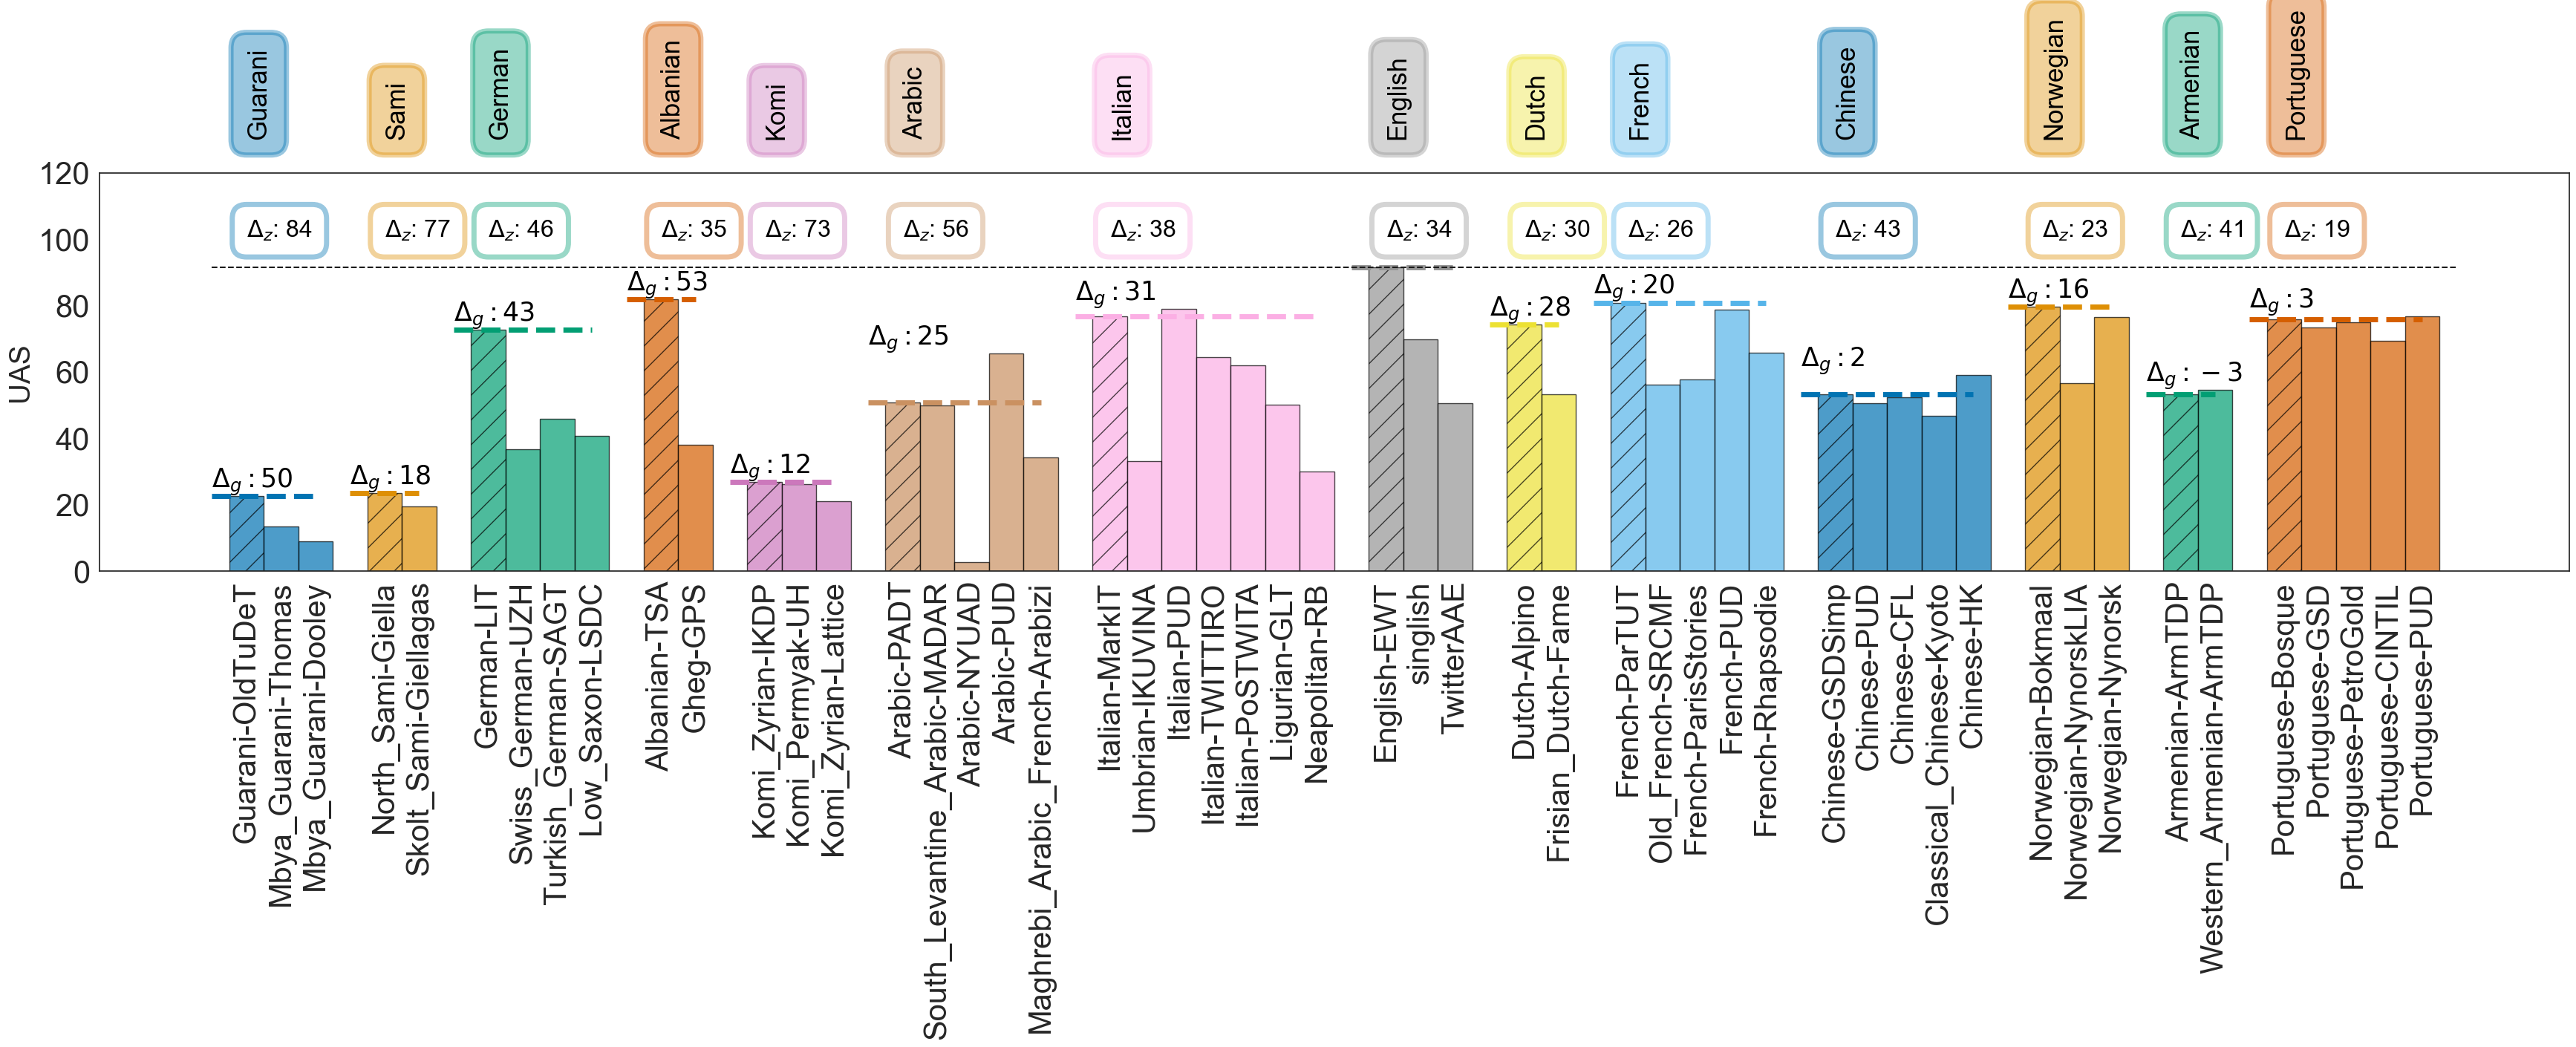

In [1837]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(1,1, figsize = (35,15))

colors=list(sns.color_palette("colorblind", 30).as_hex())


base_code='UD_English-EWT'
score_column='bert_uas_zeroshot'
target_lang_column='target'
metadata=group_langs[task]


labels = []
ax=axes
count=0
index_count=0
all_index=[]

base_score=df3.loc[df3[target_lang_column]==base_code,score_column].values[0]
ax.set_ylim(0,120)
for g, grp in df3.groupby('lang-group',sort=False):
    ##swap
    temp=grp.iloc[0].copy()
    res=grp.loc[grp[target_lang_column]==metadata[g]].index[0]
    ind=grp.index.get_loc(res)
    grp.iloc[0]=grp.iloc[ind]
    grp.iloc[ind]=temp
    
    #x-positions
    index=list(range(index_count,len(grp.index)+index_count,1))
    #print(index)
    #hatch
    hatch=['']*len(index)
    hatch[0]='/'
    
    group_base=grp.iloc[0][score_column]
    ax.plot([index[0]-1, index[-1]], [group_base, group_base],"--", linewidth=5,color=colors[count])
    ax.bar(index, grp[score_column].values,width=1,
           edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
    for ind,aa in enumerate(index):
        arr_y=grp[score_column].values[ind]
#         gap=grp.base_zero_gap_per.values[ind]
#         ax.annotate("{}".format(round(gap,1)), xy=(aa,arr_y), xytext=(aa-1, arr_y+10),
#             arrowprops=dict(arrowstyle="-",fc='k', ec='k'))
    
    zero_group=round(max(grp.base_zero_group))
    group_group=round(max(grp.group_zero_group))
    if g!='English':
        text=ax.text(index[0]-1, max(grp[score_column])+2.5,
                     "$\Delta_g: {}$".format(group_group), color='black', fontsize=25)
    text='{}'.format(g,zero_group,group_group)
    text_pos=index[0]
    ax.text(text_pos, base_score+40, text, rotation=90,color='black', fontsize=25,
        bbox=dict(facecolor=colors[count],linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))
    text='$\Delta_z$: {}'.format(zero_group)
    text=ax.text(index[0], base_score+9, text, color='black', fontsize=23,
        bbox=dict(facecolor="None",linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))

    labels.extend(grp[target_lang_column])
    all_index.extend(index)
    index_count=index[-1]+2
    count+=1

##zeroshot line    
ax.plot([-1, index_count-1], [base_score, base_score], "k--")

ax.set_xticks(all_index)
labels=[x.replace('UD_','') for x in labels]
ax.set_xticklabels( labels=labels,rotation=90,fontsize=12)
# plt.legend(ncol=9,loc='upper center',bbox_to_anchor=(.5, 1.8),fontsize=28)
ax.set_ylabel('UAS',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.savefig('../figures/dep-zeroshot.pdf')
plt.show()

In [2074]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='pos'
df=all_results[task].copy()
df=df[df['dataset']=='ud']
df.reset_index( inplace=True)
# df['tgt-code'] = list(df.index)

score_column_zero='bert_f1_zeroshot'
score_column_tune='bert_f1_tune'
target_lang_column='tgt-code'
metadata=group_langs[task]

df[score_column_zero]=df[score_column_zero]*100
df[score_column_tune]=df[score_column_tune]*100


df.loc[df['tgt']=='English',score_column_tune]=df.loc[df['tgt']=='English',score_column_zero].values[0]

df=df[df[score_column_tune]!=-100]

##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
df=all_results[task].copy()
df=df[df['dataset']=='ud']
df.reset_index( inplace=True)
# df['tgt-code'] = list(df.index)

base_code='UD_English-EWT'
score_column='bert_f1_zeroshot'
target_lang_column='tgt-code'
metadata=group_langs[task]

df[score_column]=df[score_column]*100

df['bert_f1_tune']=df['bert_f1_tune']*100
df['xlmr_f1_zeroshot']=df['xlmr_f1_zeroshot']*100
df['xlmr_f1_tune']=df['xlmr_f1_tune']*100

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)



# #### merging all 3
# df_r=pd.merge(df2, df1, how='outer', on='lang-group').fillna(-100).round(2)
# df_r=pd.merge(df3, df_r, how='outer', on='lang-group').fillna(-100).round(2)

# gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['base_zero_gap','group_zero_gap']].values[0]
# d_gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['zero_tune_gap','tune_gap']].values[0]

# df_r
df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0).replace(-100,0)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_per']=df.apply(lambda x:
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:20: SettingWithCopyWarning: 
A value is trying 

In [2075]:
print(task)
agg_df1=df3[['lang-group','base_zero_group','group_zero_group','group_tune_group']].copy()
agg_df1.drop_duplicates(keep='last', inplace=True)
agg_df2=agg_df1.groupby('lang-group')['group_tune_group'].max().reset_index()
agg_df2
agg_df = pd.merge(agg_df1[['lang-group','base_zero_group','group_zero_group']], 
                  agg_df2, how='left', on='lang-group').fillna(0)

agg_df.drop_duplicates(keep='last', inplace=True)
agg_df['mean']=agg_df.apply(lambda x: (x['base_zero_group']+x['group_zero_group']+x['group_tune_group'])/3
                           if x['group_tune_group']!=0 
                           else (x['base_zero_group']+x['group_zero_group'])/2, axis=1)
agg_df=agg_df.sort_values(by=['mean'],ascending=False)
# agg_df.drop(columns=['mean'],inplace=True)
agg_df.reset_index(drop=True,inplace=True)
agg_dfs[task]=agg_df
agg_dfs[task]

pos


,lang-group,base_zero_group,group_zero_group,group_tune_group,mean
0,Sami,70.833333,44.444444,0.000000,57.638889
1,Komi,68.402778,39.024390,0.000000,53.713584
2,Arabic,62.083333,11.250000,59.895833,44.409722
3,Albanian,34.895833,35.526316,0.000000,35.211075
4,Italian,38.541667,30.625000,27.956989,32.374552
5,German,24.218750,21.839080,0.000000,23.028915
6,Dutch,17.187500,17.241379,0.000000,17.214440
7,English,20.833333,20.833333,9.375000,17.013889
8,Chinese,39.791667,0.431034,5.263158,15.161953
9,Guarani,86.458333,-66.666667,0.000000,9.895833


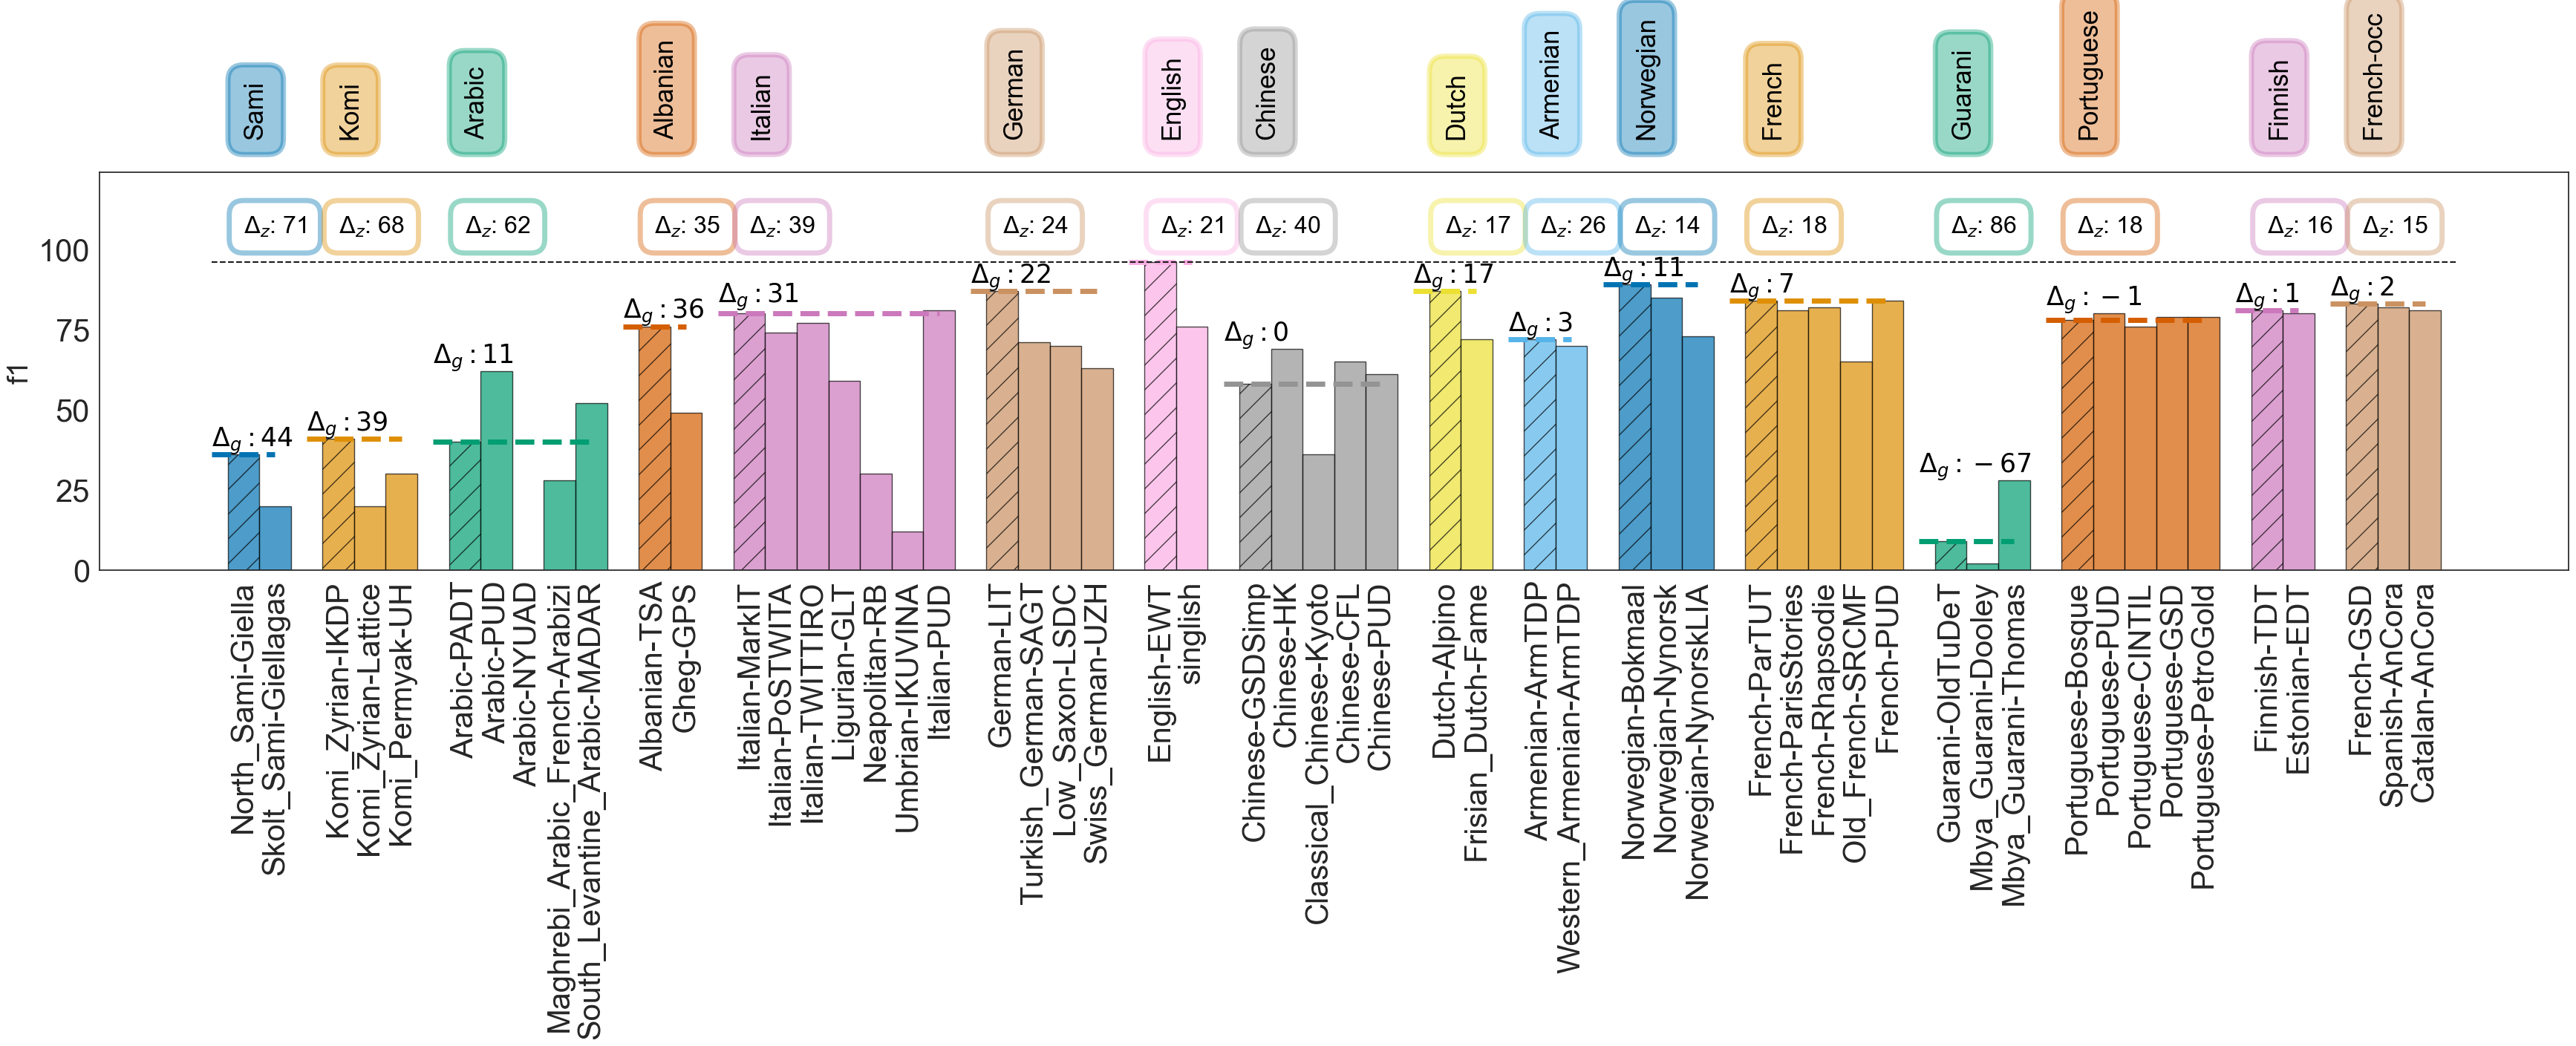

In [1937]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(1,1, figsize = (35,15))

colors=list(sns.color_palette("colorblind", 30).as_hex())


base_code='UD_English-EWT'
score_column='bert_f1_zeroshot'
target_lang_column='tgt-code'
metadata=group_langs[task]
ylabel='f1'

labels = []
ax=axes
count=0
index_count=0
all_index=[]

base_score=df3.loc[df3[target_lang_column]==base_code,score_column].values[0]
ax.set_ylim(0,124)
for g, grp in df3.groupby('lang-group',sort=False):
    ##swap
    temp=grp.iloc[0].copy()
    res=grp.loc[grp[target_lang_column]==metadata[g]].index[0]
    ind=grp.index.get_loc(res)
    grp.iloc[0]=grp.iloc[ind]
    grp.iloc[ind]=temp
    
    #x-positions
    index=list(range(index_count,len(grp.index)+index_count,1))
    #print(index)
    #hatch
    hatch=['']*len(index)
    hatch[0]='/'
    
    group_base=grp.iloc[0][score_column]
    ax.plot([index[0]-1, index[-1]], [group_base, group_base],"--", linewidth=5,color=colors[count])
    ax.bar(index, grp[score_column].values,width=1,
           edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
    for ind,aa in enumerate(index):
        arr_y=grp[score_column].values[ind]
#         gap=grp.base_zero_gap_per.values[ind]
#         ax.annotate("{}".format(round(gap,1)), xy=(aa,arr_y), xytext=(aa-1, arr_y+10),
#             arrowprops=dict(arrowstyle="-",fc='k', ec='k'))
    
    zero_group=round(max(grp.base_zero_group))
    group_group=round(max(grp.group_zero_group))
    if g!='English':
        text=ax.text(index[0]-1, max(grp[score_column])+2.5,
                     "$\Delta_g: {}$".format(group_group), color='black', fontsize=25)
    text='{}'.format(g,zero_group,group_group)
    text_pos=index[0]
    ax.text(text_pos, base_score+40, text, rotation=90,color='black', fontsize=25,
        bbox=dict(facecolor=colors[count],linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))
    text='$\Delta_z$: {}'.format(zero_group)
    text=ax.text(index[0], base_score+9, text, color='black', fontsize=23,
        bbox=dict(facecolor="None",linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))

    labels.extend(grp[target_lang_column])
    all_index.extend(index)
    index_count=index[-1]+2
    count+=1

##zeroshot line    
ax.plot([-1, index_count-1], [base_score, base_score], "k--")

ax.set_xticks(all_index)
labels=[x.replace('UD_','') for x in labels]
ax.set_xticklabels( labels=labels,rotation=90,fontsize=12)
# plt.legend(ncol=9,loc='upper center',bbox_to_anchor=(.5, 1.8),fontsize=28)
ax.set_ylabel(ylabel,fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.savefig('../figures/pos-zeroshot.pdf')
plt.show()

In [2076]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='ner'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=df[df['dataset']=='wikiann']

score_column_zero='bert_f1_zeroshot'
score_column_tune='bert_f1_tune'
target_lang_column='tgt-code'
metadata=group_langs[task]


df=df[df[score_column_tune]!=-1]


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
task='ner'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=df[df['dataset']=='wikiann']

# ner_group_lang={}
# for i in zip(df['lang-group'],df['tgt'],df['tgt-code']):
#     if i[0]==i[1]:
#         ner_group_lang[i[0]]=i[2]

base_code='en'
score_column='bert_f1_zeroshot'
target_lang_column='tgt-code'
metadata=group_langs[task]

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)

df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

# #### merging all 3
# df_r=pd.merge(df2, df1, how='outer', on='lang-group').fillna(-100).round(2)
# df_r=pd.merge(df3, df_r, how='outer', on='lang-group').fillna(-100).round(2)

# gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['base_zero_gap','group_zero_gap']].values[0]
# d_gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['zero_tune_gap','tune_gap']].values[0]

# df_r

In [2077]:
print(task)
agg_df1=df3[['lang-group','base_zero_group','group_zero_group','group_tune_group']].copy()
agg_df1.drop_duplicates(keep='last', inplace=True)
agg_df2=agg_df1.groupby('lang-group')['group_tune_group'].max().reset_index()
agg_df2
agg_df = pd.merge(agg_df1[['lang-group','base_zero_group','group_zero_group']], 
                  agg_df2, how='left', on='lang-group').fillna(0)

agg_df.drop_duplicates(keep='last', inplace=True)
agg_df['mean']=agg_df.apply(lambda x: (x['base_zero_group']+x['group_zero_group']+x['group_tune_group'])/3
                           if x['group_tune_group']!=0 
                           else (x['base_zero_group']+x['group_zero_group'])/2, axis=1)
agg_df=agg_df.sort_values(by=['mean'],ascending=False)
# agg_df.drop(columns=['mean'],inplace=True)
agg_df.reset_index(drop=True,inplace=True)
agg_dfs[task]=agg_df
agg_dfs[task]

ner


,lang-group,base_zero_group,group_zero_group,group_tune_group,mean
0,kurdish,76.785714,78.125000,92.857143,82.589286
1,azerbaijani,41.071429,52.238806,66.292135,53.200790
2,eastern mari,49.404762,19.148936,81.818182,50.123960
3,english,43.253968,43.253968,43.253968,43.253968
4,latvian,30.357143,30.434783,46.236559,35.676162
5,upper sorbian,19.047619,-9.230769,92.105263,33.974038
6,turkish,27.380952,35.135135,37.634409,33.383499
7,bangla,34.523810,42.857143,22.105263,33.162072
8,adyghe,31.547619,28.358209,0.000000,29.952914
9,french,23.809524,28.481013,35.714286,29.334941


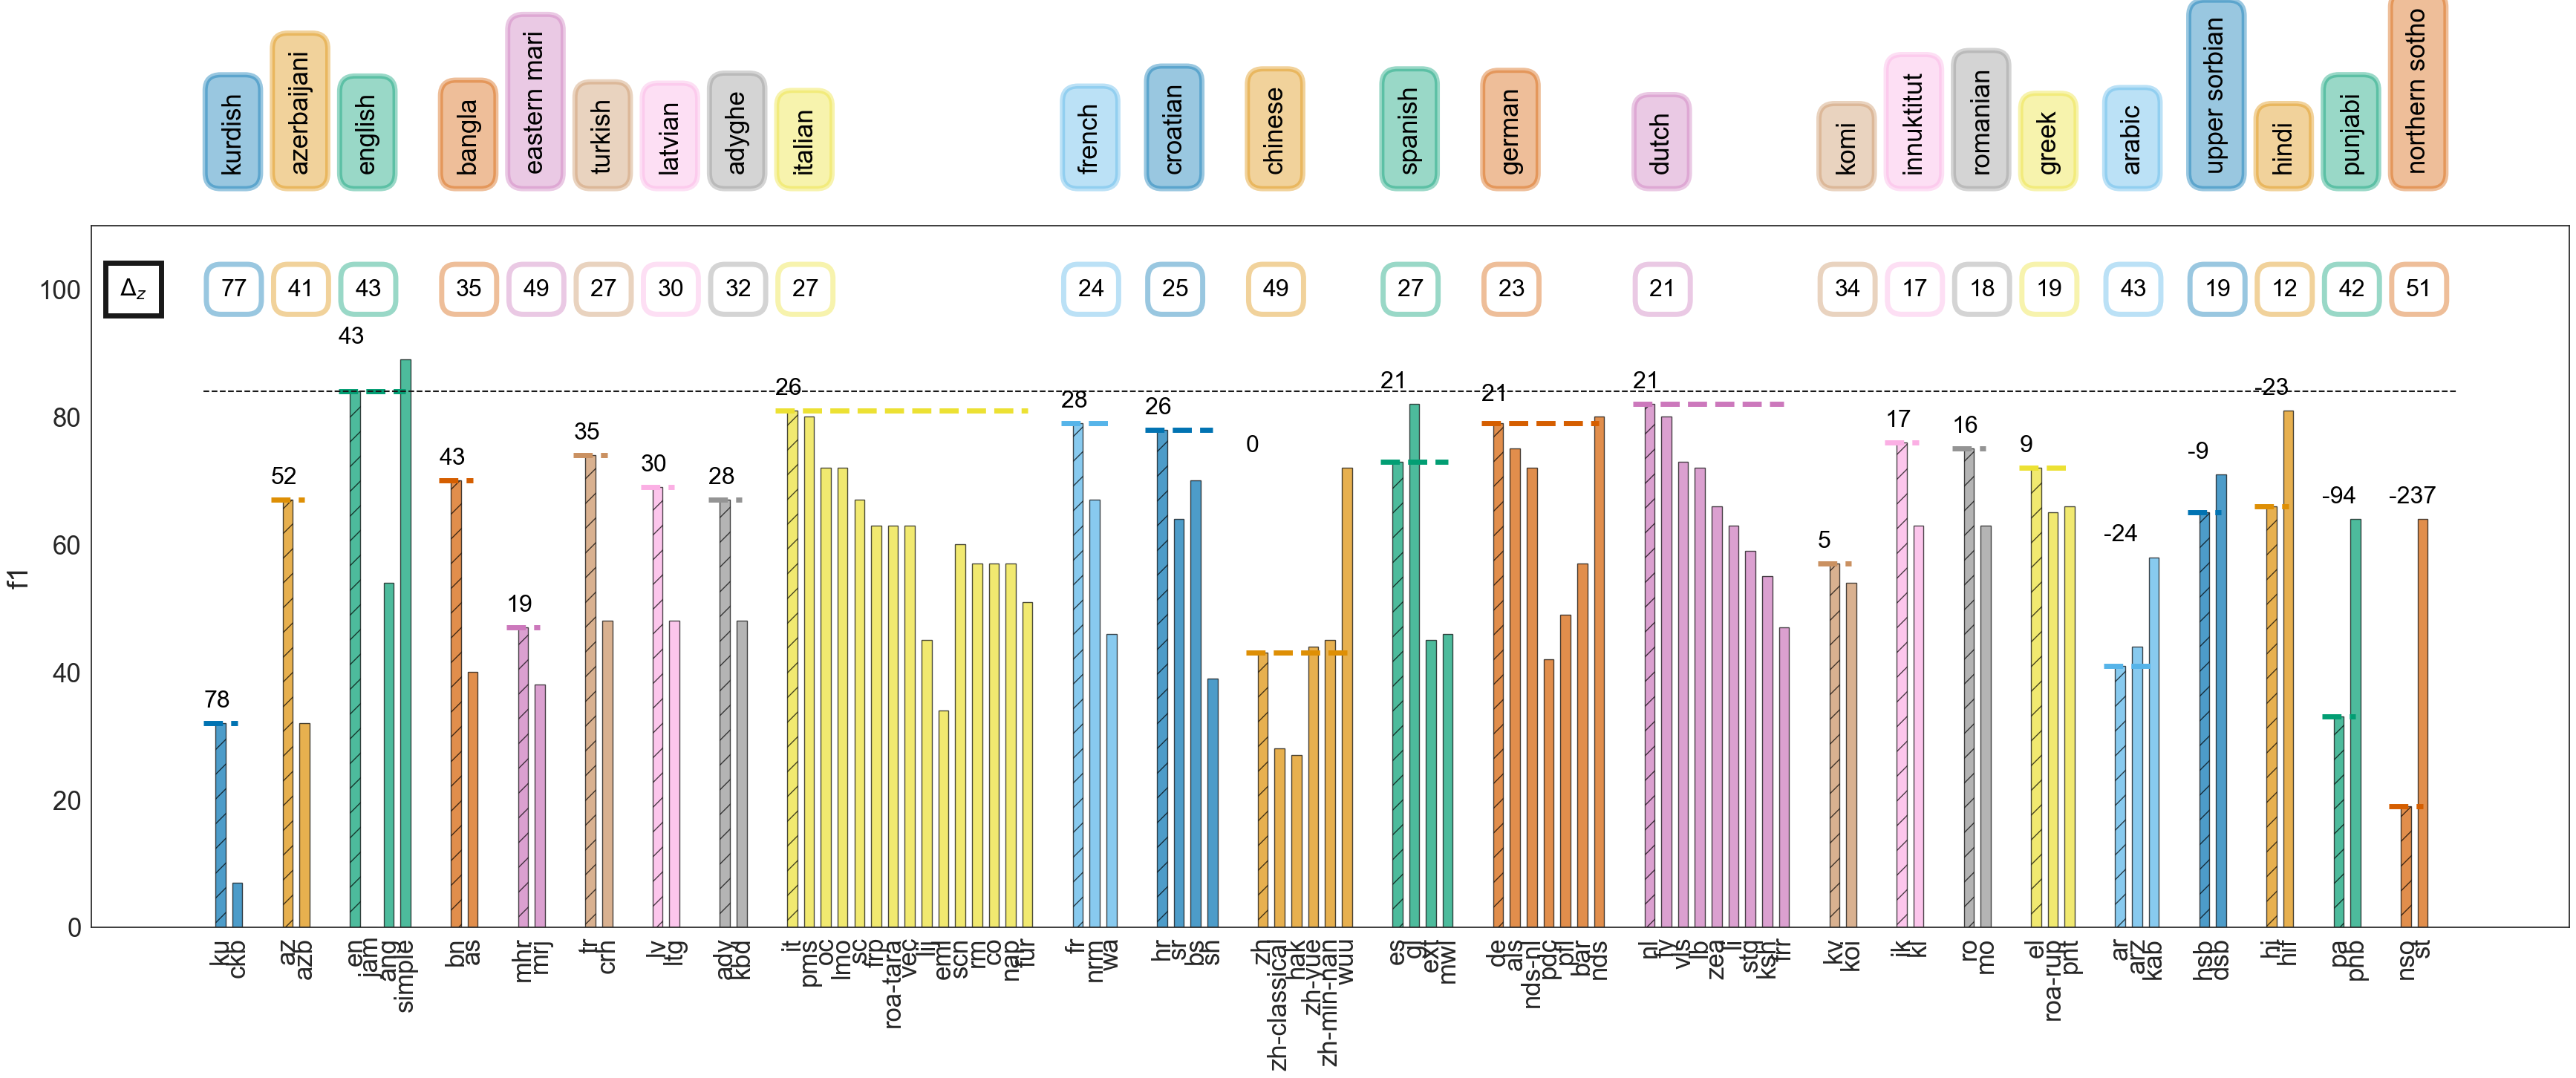

In [1877]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(1,1, figsize = (35,15))

colors=list(sns.color_palette("colorblind", 30).as_hex())


base_code='en'
score_column='bert_f1_zeroshot'
target_lang_column='tgt-code'
metadata=group_langs[task]
ylabel='f1'

labels = []
ax=axes
count=0
index_count=0
all_index=[]

base_score=df3.loc[df3[target_lang_column]==base_code,score_column].values[0]
ax.set_ylim(0,110)
for g, grp in df3.groupby('lang-group',sort=False):
    ##swap
    temp=grp.iloc[0].copy()
    res=grp.loc[grp[target_lang_column]==metadata[g]].index[0]
    ind=grp.index.get_loc(res)
    grp.iloc[0]=grp.iloc[ind]
    grp.iloc[ind]=temp
    
    #x-positions
    index=list(range(index_count,len(grp.index)+index_count,1))
    #print(index)
    #hatch
    hatch=['']*len(index)
    hatch[0]='/'
    
    group_base=grp.iloc[0][score_column]
    ax.plot([index[0]-1, index[-1]], [group_base, group_base],"--", linewidth=5,color=colors[count])
    ax.bar(index, grp[score_column].values,width=.6,
           edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
    for ind,aa in enumerate(index):
        arr_y=grp[score_column].values[ind]
#         gap=grp.base_zero_gap_per.values[ind]
#         ax.annotate("{}".format(round(gap,1)), xy=(aa,arr_y), xytext=(aa-1, arr_y+10),
#             arrowprops=dict(arrowstyle="-",fc='k', ec='k'))
    
    zero_group=round(max(grp.base_zero_group))
    group_group=round(max(grp.group_zero_group))
    if g!='English':
        text=ax.text(index[0]-1, max(grp[score_column])+2.5,
                     "{}".format(group_group), color='black', fontsize=23)
    text='{}'.format(g)
    text_pos=index[0]
    ax.text(text_pos, base_score+35, text, rotation=90,color='black', fontsize=25,
        bbox=dict(facecolor=colors[count],linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))
    text='{}'.format(zero_group)
    text=ax.text(index[0], base_score+15, text, rotation=0,color='black', fontsize=23,
        bbox=dict(facecolor="None",linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))

    labels.extend(grp[target_lang_column])
    all_index.extend(index)
    index_count=index[-1]+3
    count+=1

    
text='$\Delta_z$'.format(zero_group)
text=ax.text(all_index[0]-6, base_score+15, text, rotation=0,color='black', fontsize=23,
    bbox=dict(facecolor="None",linewidth=5,
              alpha=0.9, boxstyle="square,pad=.6",edgecolor='black'))
##zeroshot line    
ax.plot([-1, index_count-1], [base_score, base_score], "k--")

ax.set_xticks(all_index)
labels=[x.replace('UD_','') for x in labels]
ax.set_xticklabels( labels=labels,rotation=90,fontsize=12)
# plt.legend(ncol=9,loc='upper center',bbox_to_anchor=(.5, 1.8),fontsize=28)
ax.set_ylabel(ylabel,fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=25)

plt.tight_layout()
plt.savefig('../figures/ner-zeroshot.pdf')
plt.show()

In [2078]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='topic'
df=all_results[task].copy()
df['lang-group']=df['src'].str.split('_',expand=True)[0]

score_column_zero='bert_zero'
score_column_tune='bert_f1'
target_lang_column='target'
metadata=group_langs[task]


df[score_column_zero]=df[score_column_zero]*100
df[score_column_tune]=df[score_column_tune]*100


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
task='topic'
df=all_results[task].copy()
df['lang-group']=df['src'].str.split('_',expand=True)[0]

# group_lang_info={}
# for i in zip(df['lang-group'],df['target']):
#     if i[0]==i[1].split('_')[0]:
#         group_lang_info[i[0]]=i[1]

base_code='eng_Latn'
score_column='bert_zero'
target_lang_column='target'
metadata=group_langs[task]

df[score_column]=df[score_column]*100
df['bert_f1']=df['bert_f1']*100
df['xlmr_f1']=df['xlmr_f1']*100
df['xlmr_zero']=df['xlmr_zero']*100

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)


df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_per']=df.apply(lambda x:
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_4294/1409242766.py:20: SettingWithCopyWarning: 
A value is trying 

In [2079]:
print(task)
agg_df1=df3[['lang-group','base_zero_group','group_zero_group','group_tune_group']].copy()
agg_df1.drop_duplicates(keep='last', inplace=True)
agg_df2=agg_df1.groupby('lang-group')['group_tune_group'].max().reset_index()
agg_df2
agg_df = pd.merge(agg_df1[['lang-group','base_zero_group','group_zero_group']], 
                  agg_df2, how='left', on='lang-group').fillna(0)

agg_df.drop_duplicates(keep='last', inplace=True)
agg_df['mean']=agg_df.apply(lambda x: (x['base_zero_group']+x['group_zero_group']+x['group_tune_group'])/3
                           if x['group_tune_group']!=0 
                           else (x['base_zero_group']+x['group_zero_group'])/2, axis=1)
agg_df=agg_df.sort_values(by=['mean'],ascending=False)
# agg_df.drop(columns=['mean'],inplace=True)
agg_df.reset_index(drop=True,inplace=True)
agg_dfs[task]=agg_df
agg_dfs[task]

topic


,lang-group,base_zero_group,group_zero_group,group_tune_group,mean
0,lvs,26.666667,26.315789,20.987654,24.656703
1,nso,61.666667,8.333333,-14.285714,18.571429
2,ita,16.666667,17.727273,17.931034,17.441658
3,nld,12.962963,17.977528,17.222222,16.054238
4,arb,16.333333,12.679739,12.132822,13.715298
5,azj,16.666667,9.375000,7.926829,11.322832
6,zho,0.740741,1.111111,0.000000,0.925926
7,eng,0.000000,0.000000,0.000000,0.000000
8,spa,2.962963,-0.574713,-2.941176,-0.184309
9,nob,5.555556,-2.380952,-5.952381,-0.925926


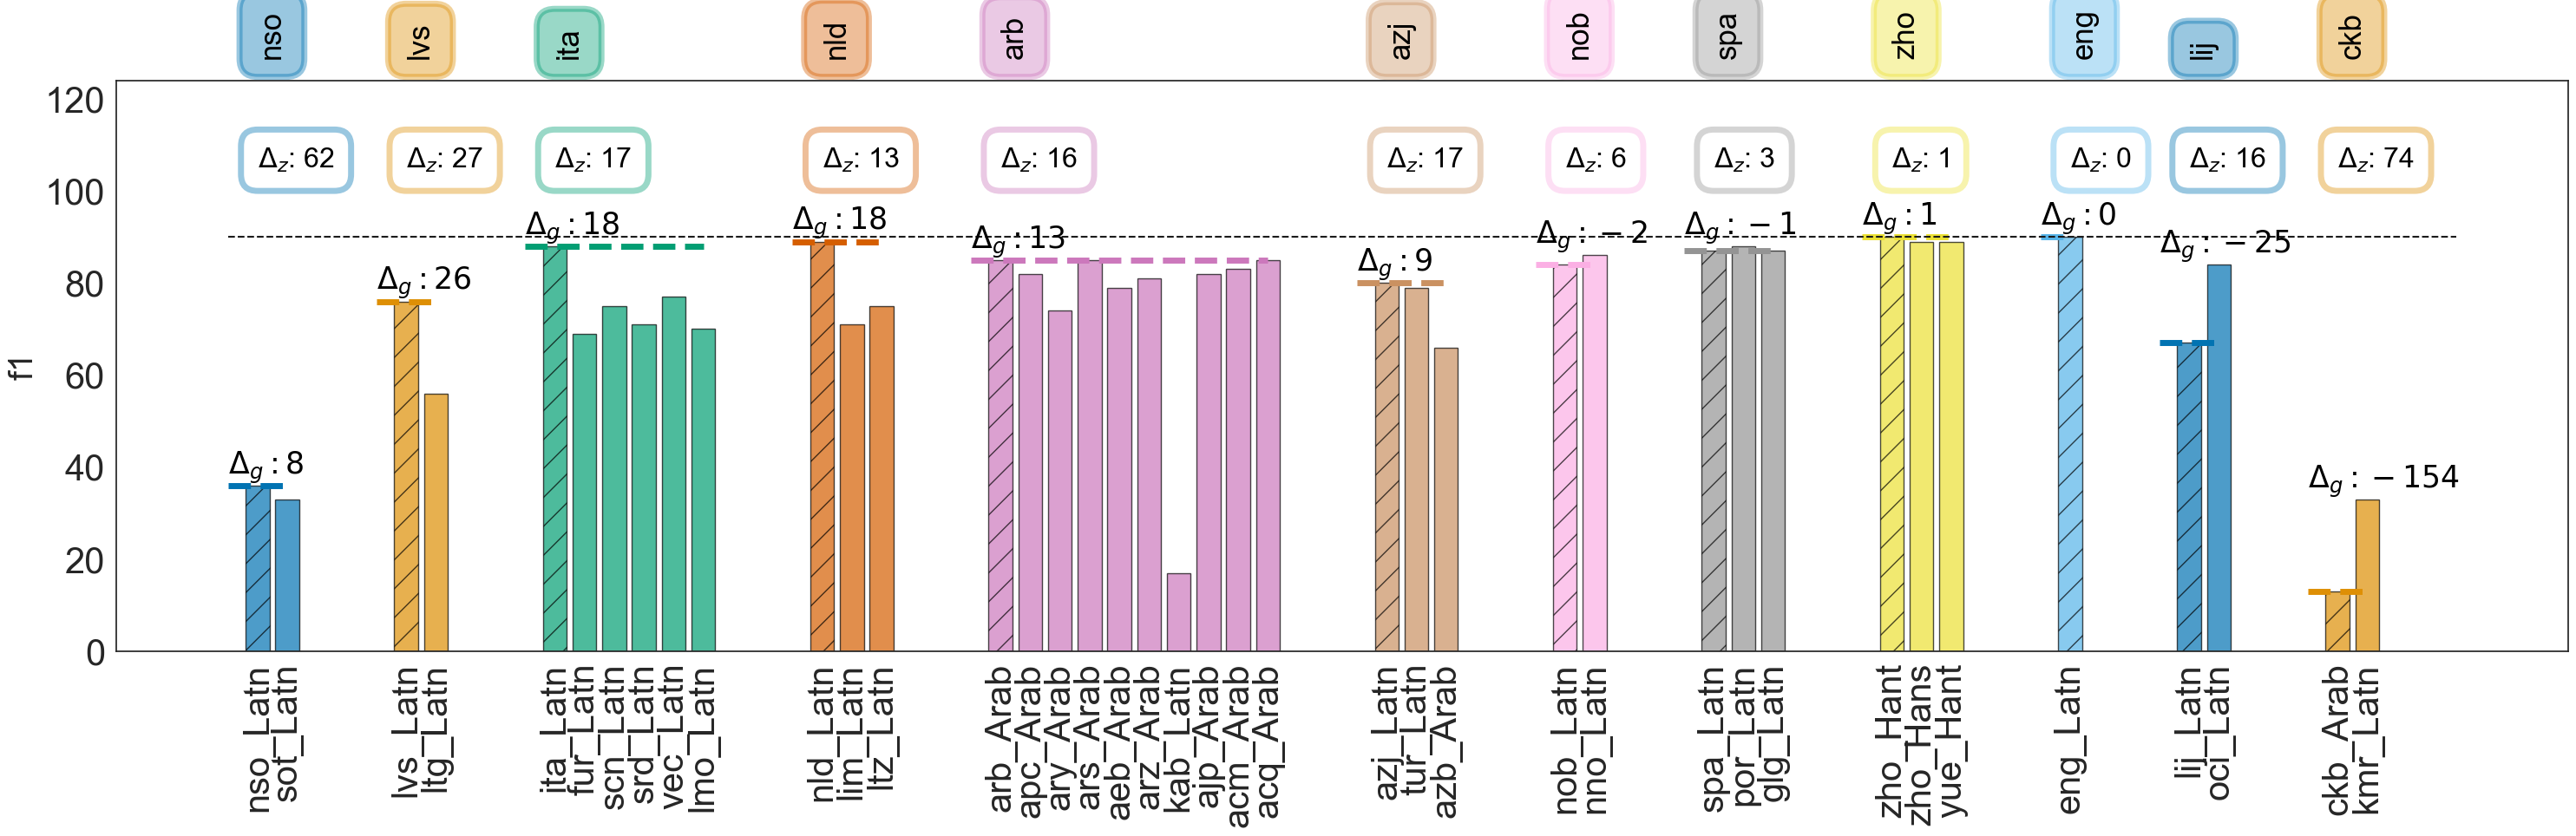

In [1889]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(1,1, figsize = (30,10))

colors=list(sns.color_palette("colorblind", 30).as_hex())


base_code='eng_Latn'
score_column='bert_zero'
target_lang_column='target'
metadata=group_langs[task]
ylabel='f1'

labels = []
ax=axes
count=0
index_count=0
all_index=[]

base_score=df3.loc[df3[target_lang_column]==base_code,score_column].values[0]
ax.set_ylim(0,124)
for g, grp in df3.groupby('lang-group',sort=False):
    ##swap
    temp=grp.iloc[0].copy()
    res=grp.loc[grp[target_lang_column]==metadata[g]].index[0]
    ind=grp.index.get_loc(res)
    grp.iloc[0]=grp.iloc[ind]
    grp.iloc[ind]=temp
    
    #x-positions
    index=list(range(index_count,len(grp.index)+index_count,1))
    #print(index)
    #hatch
    hatch=['']*len(index)
    hatch[0]='/'
    
    group_base=grp.iloc[0][score_column]
    ax.plot([index[0]-1, index[-1]], [group_base, group_base],"--", linewidth=5,color=colors[count])
    ax.bar(index, grp[score_column].values,width=.8,
           edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
    for ind,aa in enumerate(index):
        arr_y=grp[score_column].values[ind]
#         gap=grp.base_zero_gap_per.values[ind]
#         ax.annotate("{}".format(round(gap,1)), xy=(aa,arr_y), xytext=(aa-1, arr_y+10),
#             arrowprops=dict(arrowstyle="-",fc='k', ec='k'))
    
    zero_group=round(max(grp.base_zero_group))
    group_group=round(max(grp.group_zero_group))
    if g!='English':
        text=ax.text(index[0]-1, max(grp[score_column])+2.5,
                     "$\Delta_g: {}$".format(group_group), color='black', fontsize=25)
    text='{}'.format(g,zero_group,group_group)
    text_pos=index[0]
    ax.text(text_pos, base_score+40, text, rotation=90,color='black', fontsize=25,
        bbox=dict(facecolor=colors[count],linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))
    text='$\Delta_z$: {}'.format(zero_group)
    text=ax.text(index[0], base_score+15, text, color='black', fontsize=23,
        bbox=dict(facecolor="None",linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))

    labels.extend(grp[target_lang_column])
    all_index.extend(index)
    index_count=index[-1]+4
    count+=1

##zeroshot line    
ax.plot([-1, index_count-1], [base_score, base_score], "k--")

ax.set_xticks(all_index)
labels=[x.replace('UD_','') for x in labels]
ax.set_xticklabels( labels=labels,rotation=90,fontsize=12)
# plt.legend(ncol=9,loc='upper center',bbox_to_anchor=(.5, 1.8),fontsize=28)
ax.set_ylabel(ylabel,fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.savefig('../figures/topic-zeroshot.pdf')
plt.show()

In [2080]:
task='nli'
df=all_results[task].copy()
df.reset_index(inplace=True)
# df['tgt-code'] = list(df.index)

# group_lang_info={}
# for i in zip(df['lang-group'],df['tgt'],df['tgt-code']):
#     if i[0]==i[1]:
#         group_lang_info[i[0]]=i[2]

base_code='eng_Latn'
score_column='bert_f1'
target_lang_column='tgt'
metadata=group_langs[task]


df3=zero_gap(df,score_column,target_lang_column,base_code,metadata)

# gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['base_zero_gap','group_zero_gap']].values[0]

In [2081]:
print(task)
agg_df1=df3[['lang-group','base_zero_group','group_zero_group']].copy()
agg_df1['group_tune_group']=0
agg_df1.drop_duplicates(keep='last', inplace=True)
agg_df2=agg_df1.groupby('lang-group')['group_tune_group'].max().reset_index()
agg_df2
agg_df = pd.merge(agg_df1[['lang-group','base_zero_group','group_zero_group']], 
                  agg_df2, how='left', on='lang-group').fillna(0)

agg_df.drop_duplicates(keep='last', inplace=True)
agg_df['mean']=agg_df.apply(lambda x: (x['base_zero_group']+x['group_zero_group']+x['group_tune_group'])/3
                           if x['group_tune_group']!=0 
                           else (x['base_zero_group']+x['group_zero_group'])/2, axis=1)
agg_df=agg_df.sort_values(by=['mean'],ascending=False)
# agg_df.drop(columns=['mean'],inplace=True)
agg_df.reset_index(drop=True,inplace=True)
agg_dfs[task]=agg_df
agg_dfs[task]

nli


,lang-group,base_zero_group,group_zero_group,group_tune_group,mean
0,Beng,38.859060,32.899783,0,35.879422
1,kurdish,56.479561,9.278075,0,32.878818
2,sotho,57.486272,1.254991,0,29.370632
3,arabic,35.527761,21.579991,0,28.553876
4,latvian,34.734594,21.567973,0,28.151284
5,dutch,25.934513,23.143375,0,24.538944
6,italian,24.478340,19.242979,0,21.860660
7,norwegian,14.246492,6.004141,0,10.125316
8,chinese,22.599146,-4.757645,0,8.920751
9,Spanish,9.591214,2.115768,0,5.853491


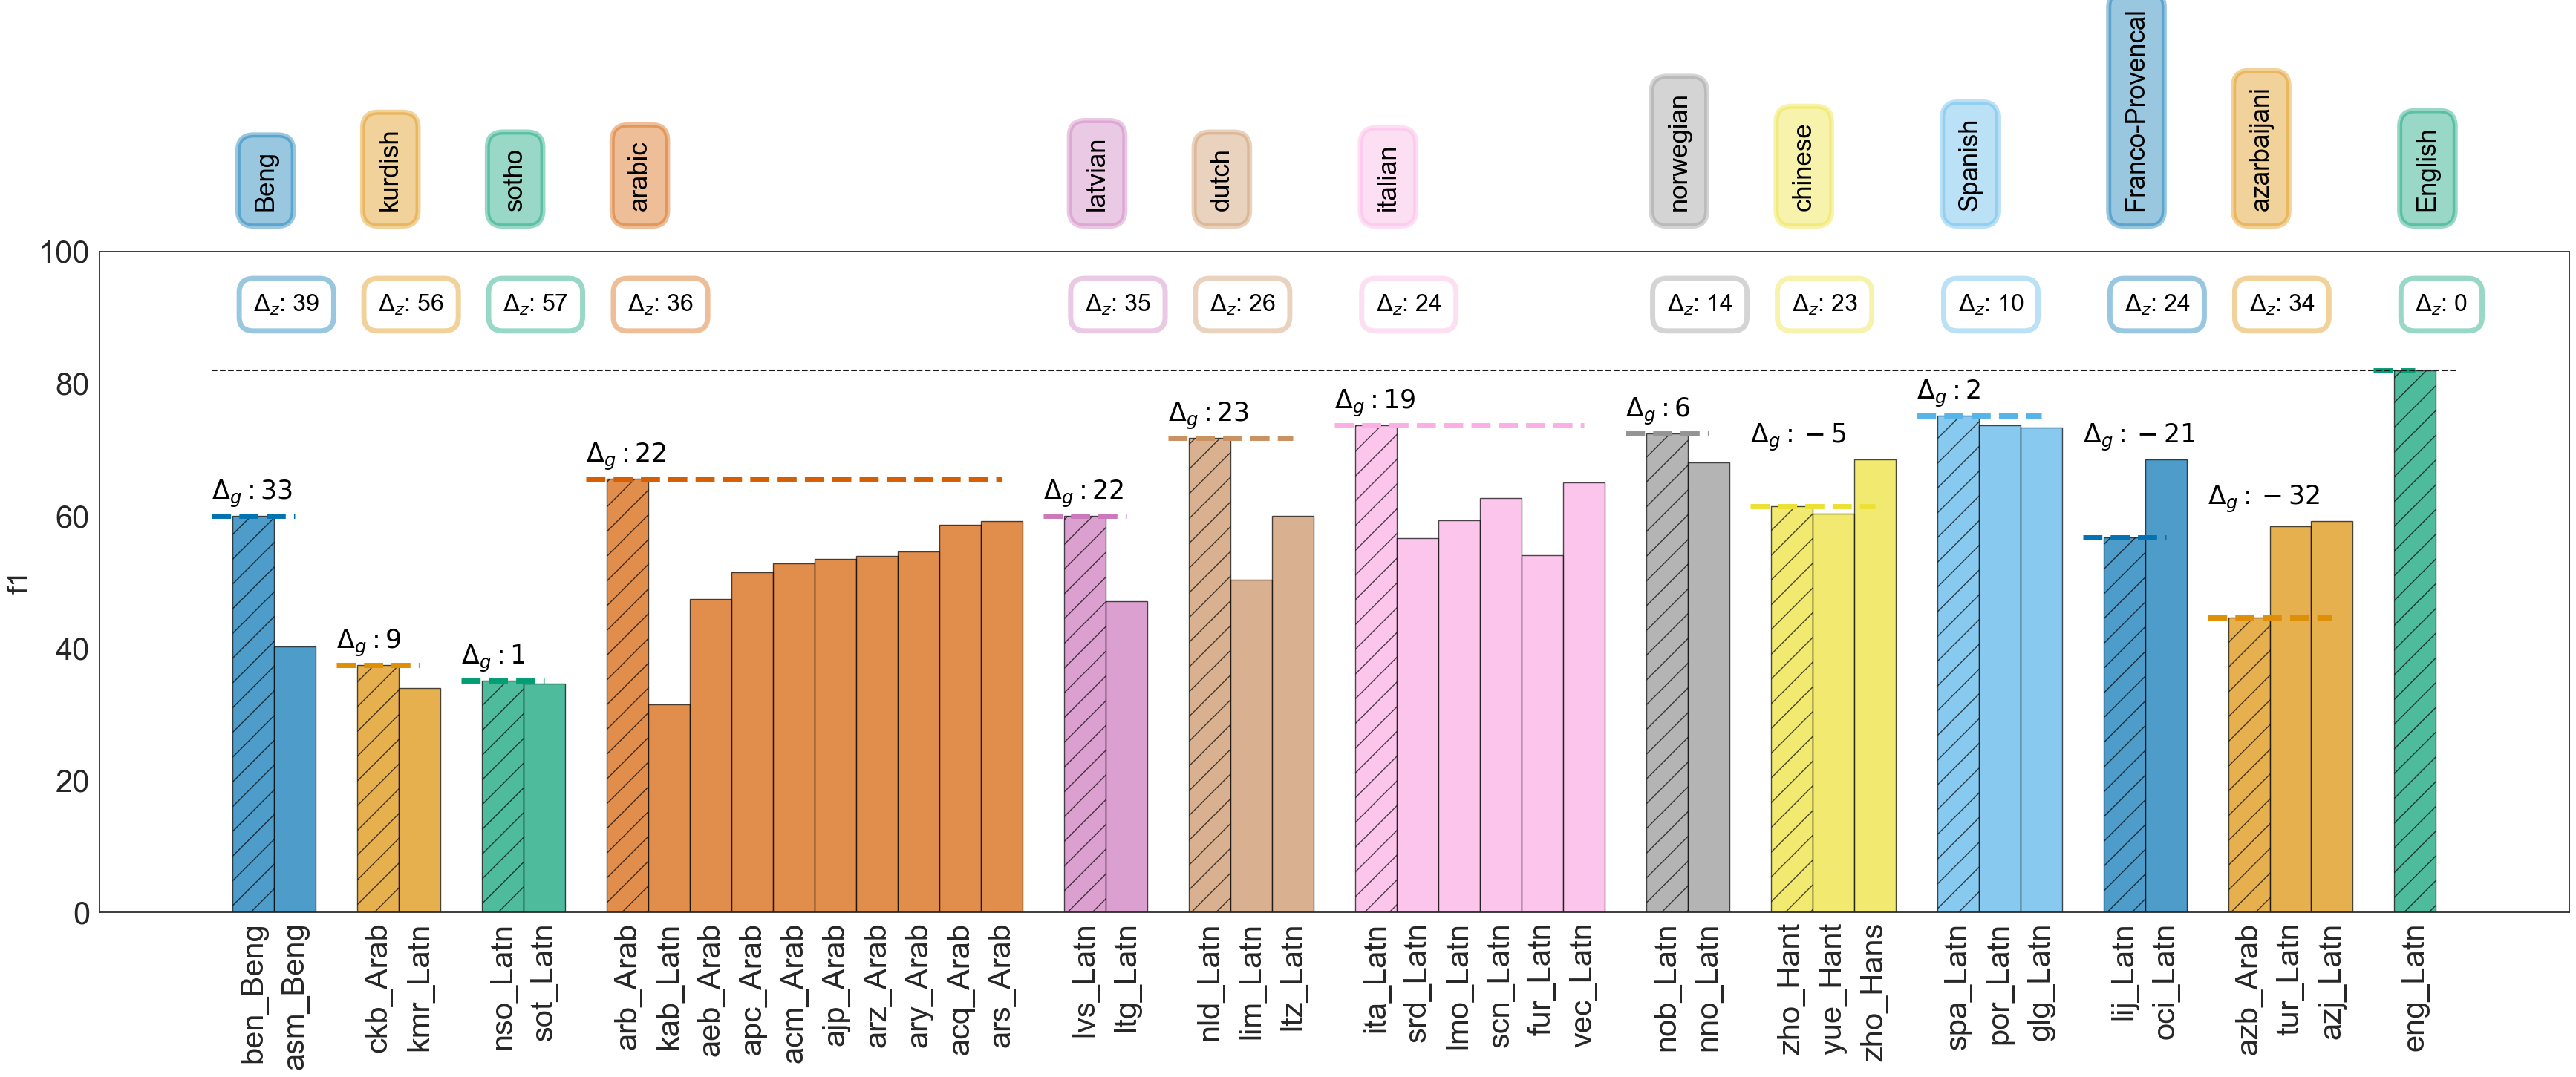

In [1897]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(1,1, figsize = (35,15))

colors=list(sns.color_palette("colorblind", 30).as_hex())


base_code='eng_Latn'
score_column='bert_f1'
target_lang_column='tgt'
metadata=group_langs[task]


labels = []
ax=axes
count=0
index_count=0
all_index=[]

base_score=df3.loc[df3[target_lang_column]==base_code,score_column].values[0]
ax.set_ylim(0,100)
for g, grp in df3.groupby('lang-group',sort=False):
    ##swap
    temp=grp.iloc[0].copy()
    res=grp.loc[grp[target_lang_column]==metadata[g]].index[0]
    ind=grp.index.get_loc(res)
    grp.iloc[0]=grp.iloc[ind]
    grp.iloc[ind]=temp
    
    #x-positions
    index=list(range(index_count,len(grp.index)+index_count,1))
    #print(index)
    #hatch
    hatch=['']*len(index)
    hatch[0]='/'
    
    group_base=grp.iloc[0][score_column]
    ax.plot([index[0]-1, index[-1]], [group_base, group_base],"--", linewidth=5,color=colors[count])
    ax.bar(index, grp[score_column].values,width=1,
           edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
    for ind,aa in enumerate(index):
        arr_y=grp[score_column].values[ind]
#         gap=grp.base_zero_gap_per.values[ind]
#         ax.annotate("{}".format(round(gap,1)), xy=(aa,arr_y), xytext=(aa-1, arr_y+10),
#             arrowprops=dict(arrowstyle="-",fc='k', ec='k'))
    
    zero_group=round(max(grp.base_zero_group))
    group_group=round(max(grp.group_zero_group))
    if g!='English':
        text=ax.text(index[0]-1, max(grp[score_column])+2.5,
                     "$\Delta_g: {}$".format(group_group), color='black', fontsize=25)
    text='{}'.format(g,zero_group,group_group)
    text_pos=index[0]
    ax.text(text_pos, base_score+25, text, rotation=90,color='black', fontsize=25,
        bbox=dict(facecolor=colors[count],linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))
    text='$\Delta_z$: {}'.format(zero_group)
    text=ax.text(index[0], base_score+9, text, color='black', fontsize=23,
        bbox=dict(facecolor="None",linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))

    labels.extend(grp[target_lang_column])
    all_index.extend(index)
    index_count=index[-1]+2
    count+=1

##zeroshot line    
ax.plot([-1, index_count-1], [base_score, base_score], "k--")

ax.set_xticks(all_index)
labels=[x.replace('UD_','') for x in labels]
ax.set_xticklabels( labels=labels,rotation=90,fontsize=12)
# plt.legend(ncol=9,loc='upper center',bbox_to_anchor=(.5, 1.8),fontsize=28)
ax.set_ylabel('f1',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.savefig('../figures/nli-zeroshot.pdf')
plt.show()

In [2082]:
task='rcmc'
df=all_results[task].copy()

base_code='eng_Latn'
score_column='bert-f1'
target_lang_column='dialect'
metadata=group_langs[task]

df['bert-f1']=df['bert-f1']*100
df['xlmr-f1']=df['xlmr-f1']*100

df3=zero_gap(df,score_column,target_lang_column,base_code,metadata)

# gap_dict[task]=df_r.loc[df_r['lang-group']=='mean',['base_zero_gap','group_zero_gap']].values[0]

In [1906]:
df3

,dialect,lang-group,bert-accuracy,xlmr-accuracy,bert-f1,xlmr-f1,base_score,base_zero_gap_abs,base_zero_gap_per,group_zero_gap_abs,group_zero_gap_per,base_zero_group,group_zero_group,avg_zero_group_per,rank,qct
3,nso_Latn,sotho,0.31,0.30,31.0,30.0,52.0,21.0,40.384615,0.0,0.000000,42.307692,6.451613,24.379653,1.0,1
4,sot_Latn,sotho,0.29,0.29,29.0,29.0,52.0,23.0,44.230769,2.0,6.451613,42.307692,6.451613,24.379653,1.0,1
5,acm_Arab,arabic,0.38,0.41,38.0,41.0,52.0,14.0,26.923077,1.0,2.564103,27.884615,4.615385,16.250000,3.0,1
6,apc_Arab,arabic,0.39,0.41,39.0,41.0,52.0,13.0,25.000000,0.0,0.000000,27.884615,4.615385,16.250000,3.0,1
7,arb_Arab,arabic,0.39,0.44,39.0,44.0,52.0,13.0,25.000000,0.0,0.000000,27.884615,4.615385,16.250000,3.0,1
8,ars_Arab,arabic,0.36,0.38,36.0,38.0,52.0,16.0,30.769231,3.0,7.692308,27.884615,4.615385,16.250000,3.0,1
9,ary_Arab,arabic,0.37,0.38,37.0,38.0,52.0,15.0,28.846154,2.0,5.128205,27.884615,4.615385,16.250000,3.0,1
10,arz_Arab,arabic,0.36,0.38,36.0,38.0,52.0,16.0,30.769231,3.0,7.692308,27.884615,4.615385,16.250000,3.0,1
0,zho_Hans,chinese,0.50,0.47,50.0,47.0,52.0,2.0,3.846154,-3.0,-6.382979,6.730769,-6.382979,0.173895,9.0,4
1,zho_Hant,chinese,0.47,0.45,47.0,45.0,52.0,5.0,9.615385,0.0,0.000000,6.730769,-6.382979,0.173895,9.0,4


In [2083]:
print(task)
agg_df1=df3[['lang-group','base_zero_group','group_zero_group']].copy()
agg_df1['group_tune_group']=0
agg_df1.drop_duplicates(keep='last', inplace=True)
agg_df2=agg_df1.groupby('lang-group')['group_tune_group'].max().reset_index()
agg_df2
agg_df = pd.merge(agg_df1[['lang-group','base_zero_group','group_zero_group']], 
                  agg_df2, how='left', on='lang-group').fillna(0)

agg_df.drop_duplicates(keep='last', inplace=True)
agg_df['mean']=agg_df.apply(lambda x: (x['base_zero_group']+x['group_zero_group']+x['group_tune_group'])/3
                           if x['group_tune_group']!=0 
                           else (x['base_zero_group']+x['group_zero_group'])/2, axis=1)
agg_df=agg_df.sort_values(by=['mean'],ascending=False)
# agg_df.drop(columns=['mean'],inplace=True)
agg_df.reset_index(drop=True,inplace=True)
agg_dfs[task]=agg_df
agg_dfs[task]

rcmc


,lang-group,base_zero_group,group_zero_group,group_tune_group,mean
0,sotho,42.307692,6.451613,0,24.379653
1,arabic,27.884615,4.615385,0,16.250000
2,chinese,6.730769,-6.382979,0,0.173895
3,English,0.000000,0.000000,0,0.000000


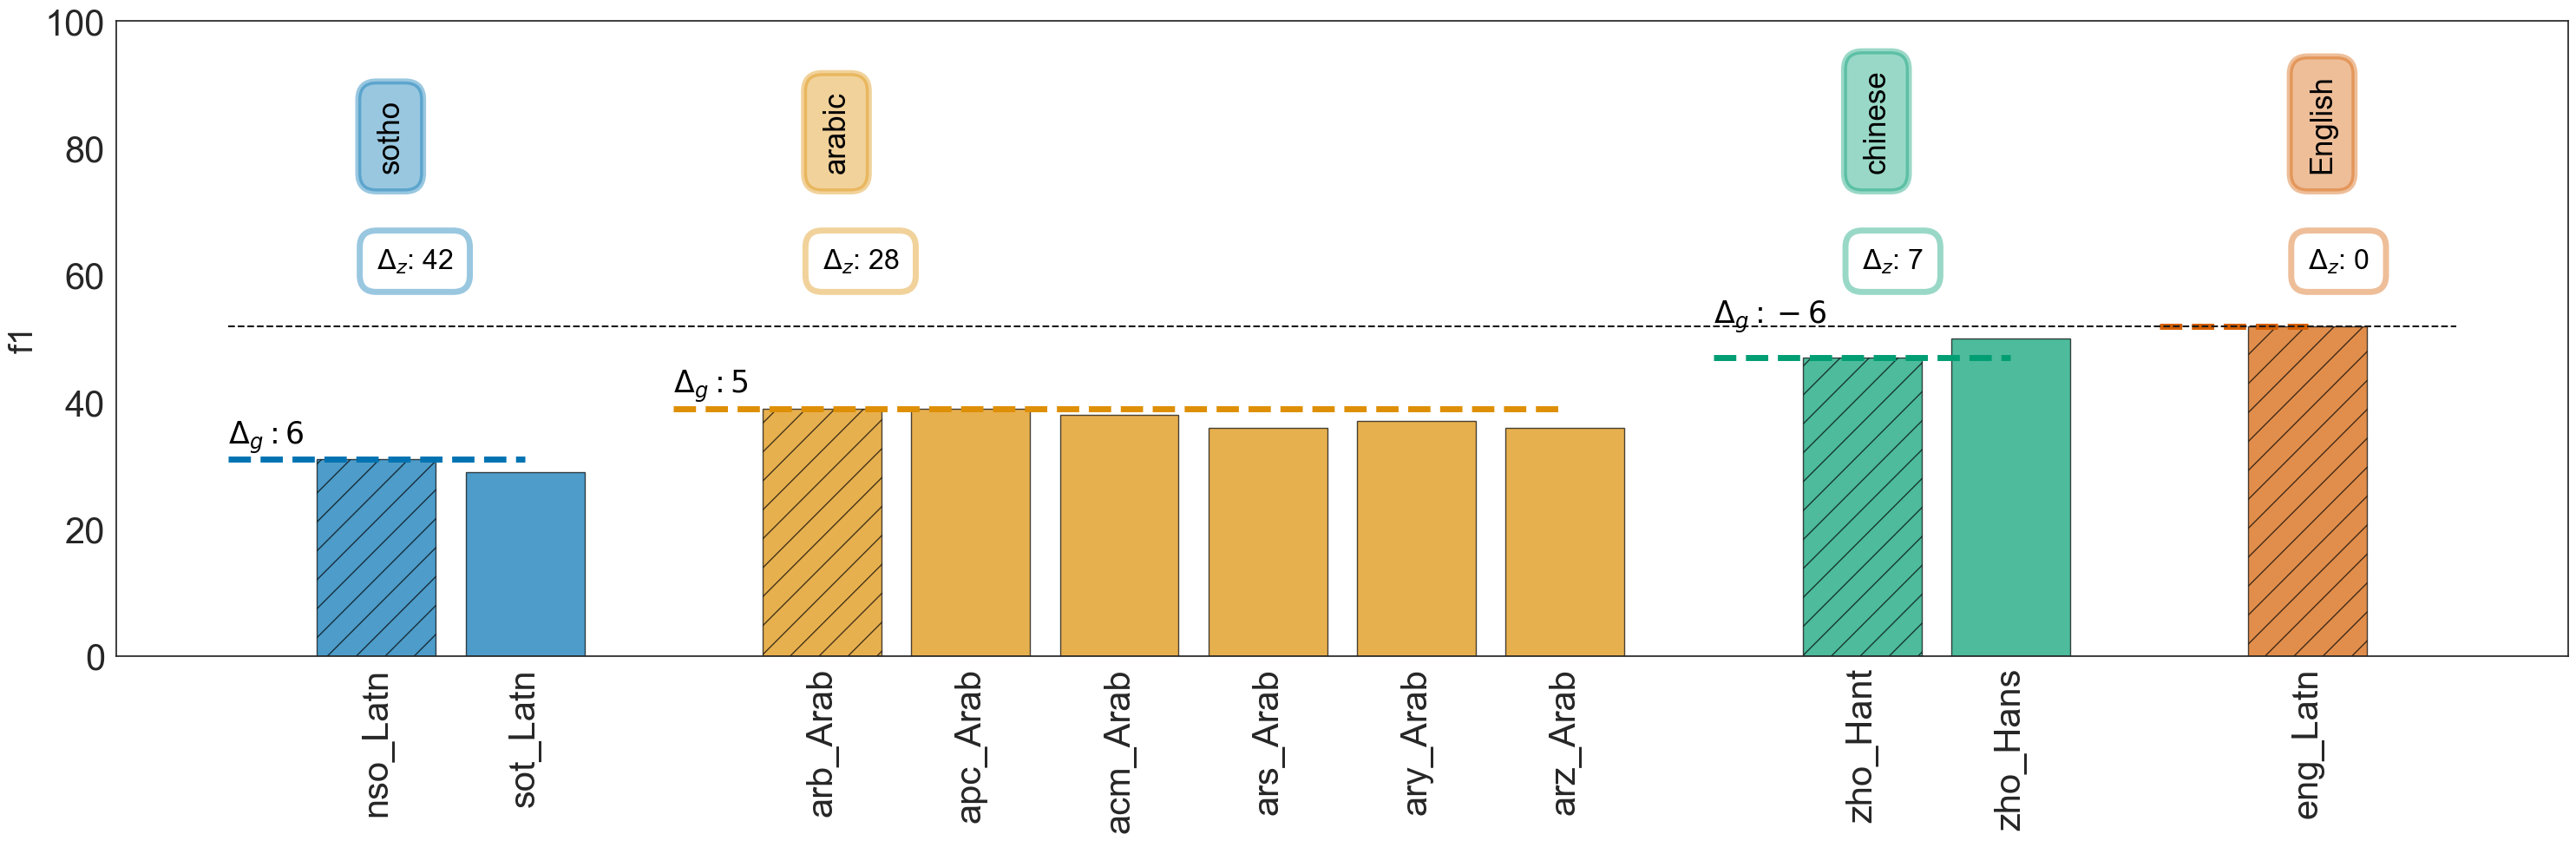

In [1910]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(1,1, figsize = (30,10))

colors=list(sns.color_palette("colorblind", 30).as_hex())


base_code='eng_Latn'
score_column='bert-f1'
target_lang_column='dialect'
metadata=group_langs[task]


labels = []
ax=axes
count=0
index_count=0
all_index=[]

base_score=df3.loc[df3[target_lang_column]==base_code,score_column].values[0]
ax.set_ylim(0,100)
for g, grp in df3.groupby('lang-group',sort=False):
    ##swap
    temp=grp.iloc[0].copy()
    res=grp.loc[grp[target_lang_column]==metadata[g]].index[0]
    ind=grp.index.get_loc(res)
    grp.iloc[0]=grp.iloc[ind]
    grp.iloc[ind]=temp
    
    #x-positions
    index=list(range(index_count,len(grp.index)+index_count,1))
    #print(index)
    #hatch
    hatch=['']*len(index)
    hatch[0]='/'
    
    group_base=grp.iloc[0][score_column]
    ax.plot([index[0]-1, index[-1]], [group_base, group_base],"--", linewidth=5,color=colors[count])
    ax.bar(index, grp[score_column].values,width=.8,
           edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
    for ind,aa in enumerate(index):
        arr_y=grp[score_column].values[ind]
#         gap=grp.base_zero_gap_per.values[ind]
#         ax.annotate("{}".format(round(gap,1)), xy=(aa,arr_y), xytext=(aa-1, arr_y+10),
#             arrowprops=dict(arrowstyle="-",fc='k', ec='k'))
    
    zero_group=round(max(grp.base_zero_group))
    group_group=round(max(grp.group_zero_group))
    if g!='English':
        text=ax.text(index[0]-1, max(grp[score_column])+2.5,
                     "$\Delta_g: {}$".format(group_group), color='black', fontsize=25)
    text='{}'.format(g,zero_group,group_group)
    text_pos=index[0]
    ax.text(text_pos, base_score+25, text, rotation=90,color='black', fontsize=25,
        bbox=dict(facecolor=colors[count],linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))
    text='$\Delta_z$: {}'.format(zero_group)
    text=ax.text(index[0], base_score+9, text, color='black', fontsize=23,
        bbox=dict(facecolor="None",linewidth=5,
                  alpha=0.4, boxstyle="round,pad=.6",edgecolor=colors[count]))

    labels.extend(grp[target_lang_column])
    all_index.extend(index)
    index_count=index[-1]+2
    count+=1

##zeroshot line    
ax.plot([-1, index_count-1], [base_score, base_score], "k--")

ax.set_xticks(all_index)
labels=[x.replace('UD_','') for x in labels]
ax.set_xticklabels( labels=labels,rotation=90,fontsize=12)
# plt.legend(ncol=9,loc='upper center',bbox_to_anchor=(.5, 1.8),fontsize=28)
ax.set_ylabel('f1',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.savefig('../figures/rcmc-zeroshot.pdf')
plt.show()

In [1983]:
df

,index,lang-group,base_zero_group,group_zero_group,group_tune_group
0,0,Guarani,83.600947,50.265722,0.000000
1,1,Sami,76.521027,17.684478,0.000000
2,2,German,46.452758,43.363157,0.000000
3,3,Albanian,34.505735,53.362680,0.000000
4,4,Komi,73.049336,12.365192,0.000000
5,6,Arabic,55.539050,24.980342,95.586074
6,8,Italian,38.272607,30.853833,29.692688
7,10,English,34.238121,34.238121,10.038230
8,11,Dutch,30.360459,28.338718,0.000000
9,13,French,25.907155,20.152714,9.744845


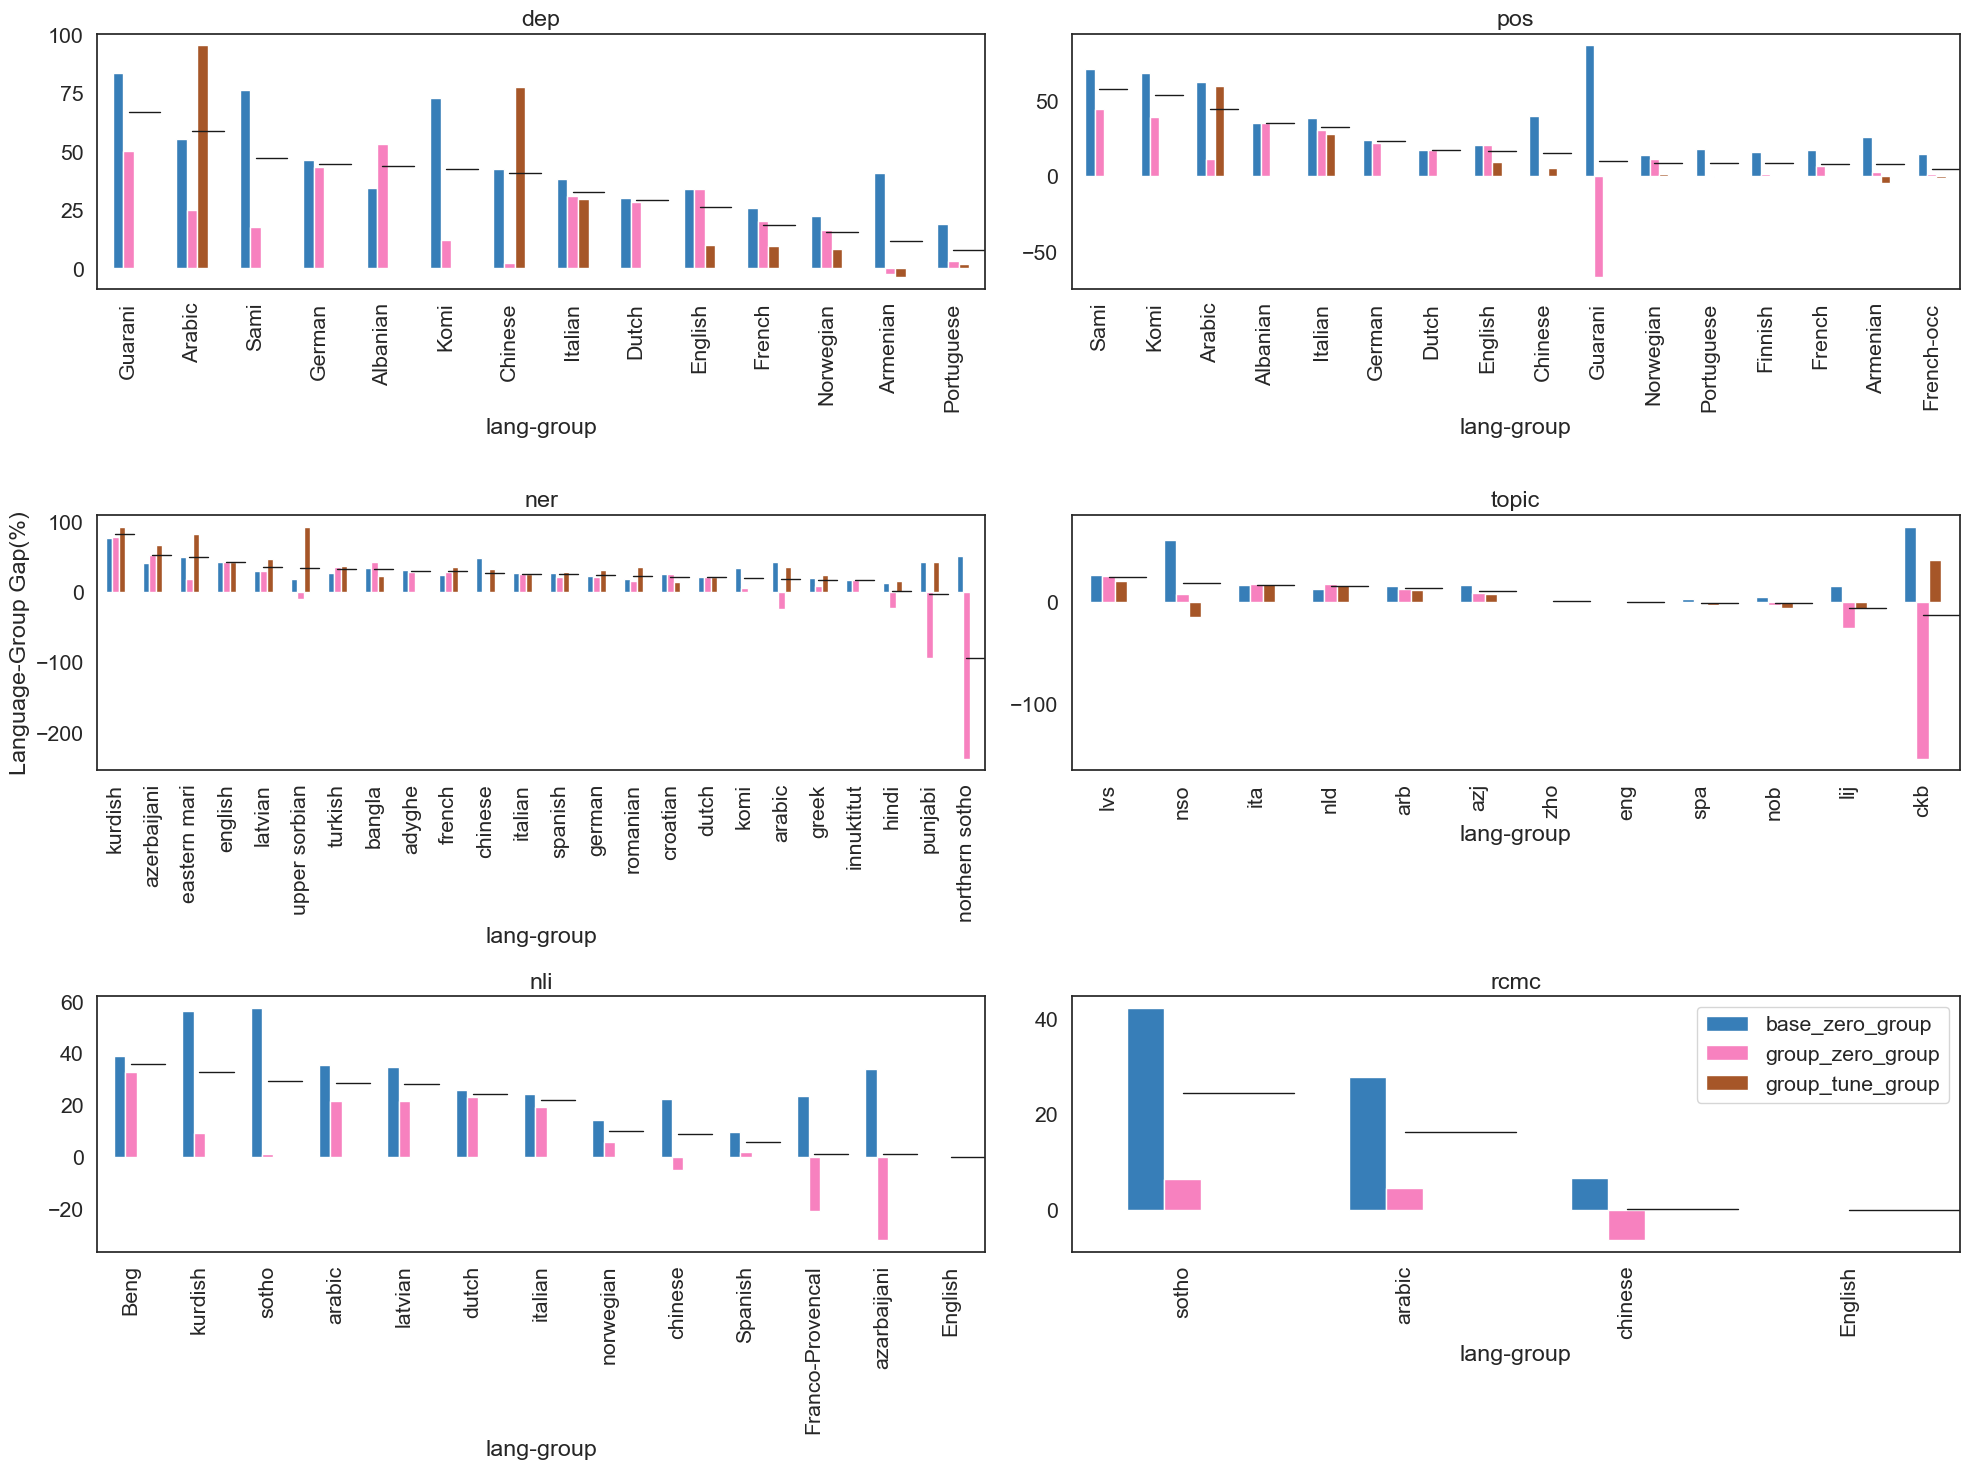

In [2190]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import seaborn as sns
sns.set_style(style='white')

fig, axes = plt.subplots(3,2, figsize = (20,15))

colors=['#377eb8', 
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


ax=axes[0][0]
# ax.set_xlim(-200,200)
task='dep'
df=agg_dfs[task].copy()
df.plot('lang-group',['base_zero_group', 'group_zero_group', 'group_tune_group']
        ,kind='bar',title=task,ax=ax,color=colors)
for ii,i in enumerate(df.index):
    ax.plot([ii,ii+0.5], [df.iloc[ii]['mean'], df.iloc[ii]['mean']],"k-", linewidth=1)
ax.get_legend().remove()

ax=axes[0][1]
# ax.set_ylim(-200,200)
task='pos'
df=agg_dfs[task].copy()
df.plot('lang-group',['base_zero_group', 'group_zero_group', 'group_tune_group']
        ,kind='bar',title=task,ax=ax,color=colors)
for ii,i in enumerate(df.index):
    ax.plot([ii,ii+0.5], [df.iloc[ii]['mean'], df.iloc[ii]['mean']],"k-", linewidth=1)
ax.get_legend().remove()

ax=axes[1][0]
# ax.set_ylim(-200,200)
task='ner'
df=agg_dfs[task].copy()
df.plot('lang-group',['base_zero_group', 'group_zero_group', 'group_tune_group']
        ,kind='bar',title=task,ax=ax,color=colors)
for ii,i in enumerate(df.index):
    ax.plot([ii,ii+0.5], [df.iloc[ii]['mean'], df.iloc[ii]['mean']],"k-", linewidth=1)
ax.get_legend().remove()

ax=axes[1][1]
# ax.set_ylim(-200,200)
task='topic'
df=agg_dfs[task].copy()
df.plot('lang-group',['base_zero_group', 'group_zero_group', 'group_tune_group']
        ,kind='bar',title=task,ax=ax,color=colors)
for ii,i in enumerate(df.index):
    ax.plot([ii,ii+0.5], [df.iloc[ii]['mean'], df.iloc[ii]['mean']],"k-", linewidth=1)
ax.get_legend().remove()
    

ax=axes[2][0]
# ax.set_ylim(-200,200)
task='nli'
df=agg_dfs[task].copy()
df.plot('lang-group',['base_zero_group', 'group_zero_group', 'group_tune_group']
        ,kind='bar',title=task,ax=ax,color=colors)
for ii,i in enumerate(df.index):
    ax.plot([ii,ii+0.5], [df.iloc[ii]['mean'], df.iloc[ii]['mean']],"k-", linewidth=1)
ax.get_legend().remove()
    

ax=axes[2][1]
# ax.set_ylim(-200,200)
task='rcmc'
df=agg_dfs[task].copy()
df.plot('lang-group',['base_zero_group', 'group_zero_group', 'group_tune_group']
        ,kind='bar',title=task,ax=ax,color=colors)
for ii,i in enumerate(df.index):
    ax.plot([ii,ii+0.5], [df.iloc[ii]['mean'], df.iloc[ii]['mean']],"k-", linewidth=1)
# df=agg_dfs[task].copy()
# df.plot.bar(x='lang-group',title=task,ax=ax,color=colors)
# ax.bar(df.index, grp[score_column].values,width=.8,
#            edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)

# ax.tick_params(axis='both', which='major', labelsize=30)

axes[1][0].set_ylabel('Language-Group Gap(%)')
# ax.legend(ncol=6,bbox_to_anchor=(.5, 1.2))



plt.tight_layout()
plt.savefig('../figures/percet-gap.pdf')
plt.show()

### dialect count

In [1040]:
dialect_groups={'Albanian': 'Albanian',
 'Arabic': 'Arabic',
 'Armenian': 'Armenian',
 'Chinese': 'Chinese',
 'Dutch': 'Dutch',
 'English': 'English',
 'French': 'French',
 'German': 'German',
 'Guarani': 'Guarani',
 'Italian': 'Italian',
 'Komi': 'Komi',
 'Norwegian': 'Norwegian',
 'Portuguese': 'Portuguese',
 'Sami': 'Sami',
 'arb_Arab_sib': 'Arabic',
 'azj_Latn_sib': 'Azarbaijani',
 'ckb_Arab_sib': 'Kurdish',
 'eng_Latn_sib': 'English',
 'ita_Latn_sib': 'Italian',
 'lij_Latn_sib': 'Ligurian',
 'lvs_Latn_sib': 'Latvian',
 'nld_Latn_sib': 'Dutch',
 'nob_Latn_sib': 'Norwegian',
 'nso_Latn_sib': 'Sotho',
 'spa_Latn_sib': 'Spanish',
 'zho_Hans_sib': 'Chinese',
 'arabic': 'Arabic',
 'chinese': 'Chinese',
 'sotho': 'sotho',
 'adyghe': 'adyghe',
 'azerbaijani': 'azerbaijani',
 'bangla': 'bengali',
 'english':'English',
                'korean':'Korean',
                'swahili':'Swahili',
                'arabic':'Arabic',
                'bengali':'Bengali',
 'croatian': 'croatian',
 'dutch': 'Dutch',
 'eastern mari': 'mari',
 'english': 'English',
 'french': 'French',
 'german': 'German',
 'greek': 'Greek',
 'hindi': 'Hindi',
 'innuktitut': 'Innuktitut',
 'italian': 'Italian',
 'komi': 'Komi',
 'kurdish': 'Kurdish',
 'latvian': 'Latvian',
 'northern sotho': 'Sotho',
 'norwegian': 'Norwegian',
 'punjabi': 'Punjabi',
 'romanian': 'Romanian',
 'spanish': 'Spanish',
 'turkish': 'Turkish',
 'upper sorbian': 'Sorbian',
 'Beng': 'Bengali',
 'Franco-Provencal': 'Franco-Provencal',
 'Spanish': 'Spanish',
 'azarbaijani': 'Azarbaijani',
 'Finnish': 'Finnish',
 'French-occ': 'French-occ'}

In [1092]:
passes=['sdqa-test','di-madar']
total_dialect={}
for i in all_results:
    df=all_results[i].copy()
    df.reset_index(level=0, inplace=True)
    if i=='topic':
        df['lang-group']=df['src']
    if i=='sdqa-dev':
        i='sdqa'
        xx=all_results['sdqa-dev'].copy()
        xx=xx[(xx['target'].str.endswith('total')==False)]
        xx=xx[(xx['target'].str.startswith('all')==False)]
        xx['lang-group']=xx.apply(lambda x: x['target'].split('--')[0],axis=1)
        df=xx
    if i not in passes:
        df['lang-group']=df.apply(lambda x: dialect_groups[x['lang-group']] if 
                                  x['lang-group'] in dialect_groups else 0,axis=1)
        total_dialect[i]=df.groupby('lang-group').size().to_dict()

In [1093]:
dial_count=pd.DataFrame.from_dict(total_dialect).fillna(0)
dial_count['total']=dial_count.sum(axis=1)
dial_count.loc['total'] = dial_count.sum()
dial_count=dial_count

In [1094]:
dial_count=dial_count.sort_values(by=['total','ner','dep', 'topic', 'rcmc', 'ner', 'nli', 'pos'],ascending=False)

In [1095]:
dial_count = dial_count.T
dial_count = dial_count.drop(columns=[0]).T
# dial_count = dial_count.drop(columns=['total'])
# df=dial_count[dial_count['total']>2].T
df=dial_count.T

In [1096]:
df

,total,Arabic,Italian,Chinese,English,Dutch,German,French,Norwegian,Spanish,...,Sorbian,Turkish,adyghe,azerbaijani,bengali,mari,Ligurian,Franco-Provencal,Korean,Swahili
dep,52.0,5.0,7.0,5.0,3.0,2.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sdqa,24.0,7.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
topic,39.0,10.0,6.0,3.0,1.0,3.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
rcmc,11.0,6.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ner,90.0,3.0,15.0,6.0,4.0,9.0,7.0,3.0,3.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
nli,41.0,10.0,6.0,3.0,1.0,3.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
pos,66.0,9.0,7.0,5.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,323.0,50.0,41.0,24.0,23.0,19.0,15.0,13.0,13.0,10.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


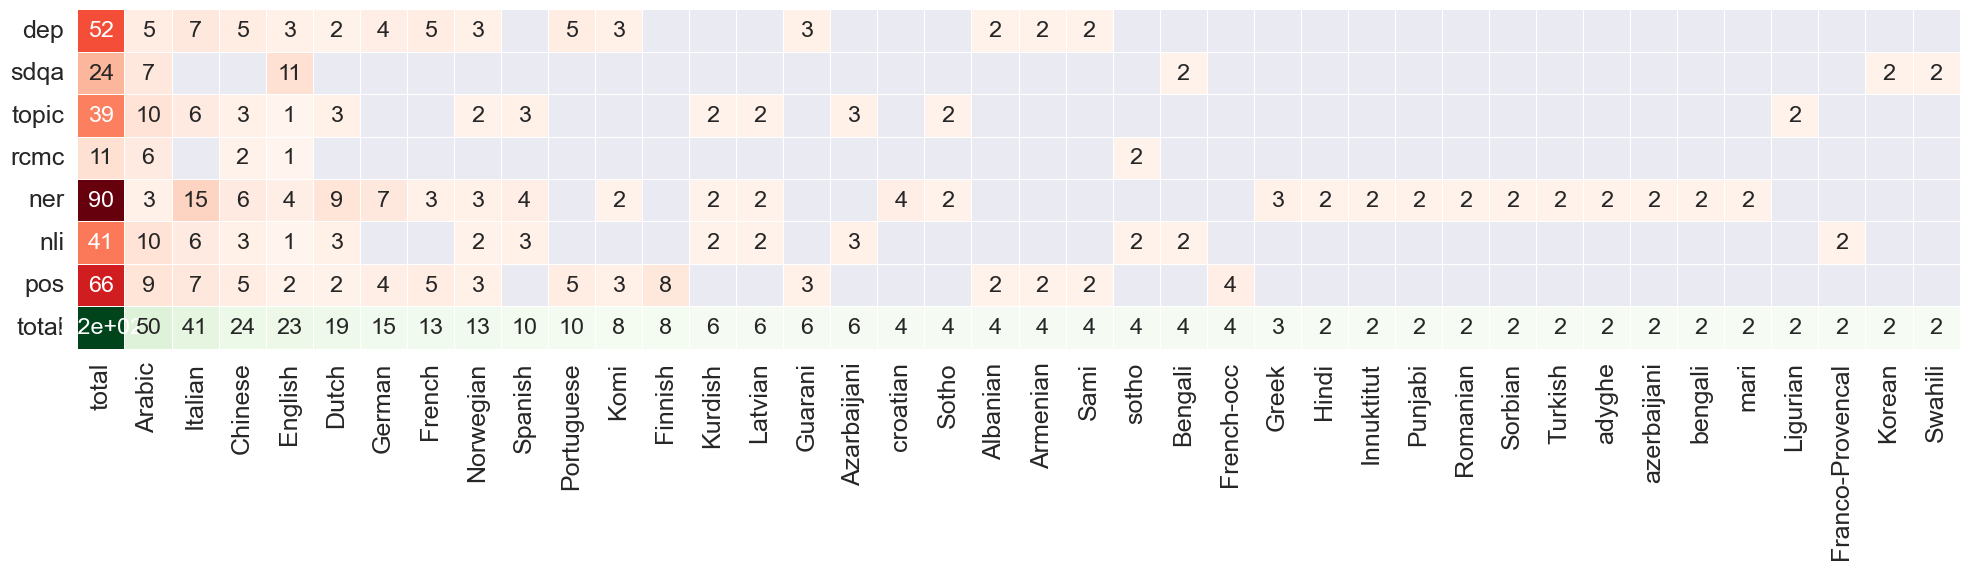

In [1104]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize = (20,6))
# sns.set(rc={'figure.figsize':(20,5)})
sns.set(font_scale=1.4)

data1=df.copy()
data1.loc['total']=float('nan')
# sns.color_palette("tab10")
ax=sns.heatmap(data1, mask=(data1==0),vmin=0,cmap="Reds",annot=True,linewidth=.5,cbar=False)

data2=df.copy()
data2.iloc[:-1]=float('nan')
# sns.color_palette("tab10")
ax=sns.heatmap(data2, mask=(data2==0),vmin=0,cmap="Greens",annot=True,linewidth=.5,cbar=False)

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 18)

plt.tight_layout()
plt.savefig('../figures/dialect_count.pdf')

In [820]:
df

,Arabic,Italian,Chinese,Dutch,German,French,Norwegian,English,Spanish,Portuguese,...,bangla,adyghe,Ligurian,Turkish,Sorbian,Romanian,Punjabi,Innuktitut,Hindi,0
dep,5.0,7.0,5.0,2.0,4.0,5.0,3.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
topic,10.0,6.0,3.0,3.0,0.0,0.0,2.0,1.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rcmc,6.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ner,3.0,15.0,6.0,9.0,7.0,3.0,3.0,4.0,4.0,0.0,...,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
nli,10.0,6.0,3.0,3.0,0.0,0.0,2.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pos,9.0,7.0,5.0,2.0,4.0,5.0,3.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,43.0,41.0,24.0,19.0,15.0,13.0,13.0,12.0,10.0,10.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
